## Import Libraries


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

##Load and preprocess dataset

In [42]:
data = [

{	"Sentences"	:	"	අහං චන්‍දං පස‍්සාමි 	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	චන්‍දං	"	,	"Verb"	:	"	පස‍්සාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සිස‍්සො භත‍්තං භුඤ‍්ජති 	"	,	"Subject"	:	"	සිස‍්සො	"	,	"Object"	:	"	භත‍්තං	"	,	"Verb"	:	"	භුඤ‍්ජති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ආචාරියො අක‍්ඛරං ලිඛති  	"	,	"Subject"	:	"	ආචාරියො	"	,	"Object"	:	"	අක‍්ඛරං	"	,	"Verb"	:	"	ලිඛති 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මිත‍්තො ගාමං ගච‍්ඡති 	"	,	"Subject"	:	"	මිත‍්තො	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගච‍්ඡති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අස‍්සො නගරං ධාවති 	"	,	"Subject"	:	"	අස‍්සො	"	,	"Object"	:	"	නගරං	"	,	"Verb"	:	"	ධාවති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බුද‍්ධො තිට‍්ඨති	"	,	"Subject"	:	"	බුද‍්ධො	"	,	"Object"	:	"		"	,	"Verb"	:	"	තිට‍්ඨති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මිගා ධාවන‍්ති	"	,	"Subject"	:	"	මිගා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ධාවන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සීහා සයන‍්ති	"	,	"Subject"	:	"	සීහා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	සයන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසො ගච‍්ඡති	"	,	"Subject"	:	"	පුරිසො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	ගච‍්ඡති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	රජකා ධොවන‍්ති	"	,	"Subject"	:	"	රජකා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ධොවන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කස‍්සකා කසන‍්ති	"	,	"Subject"	:	"	කස‍්සකා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 කසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ලෙඛකො ලිඛති	"	,	"Subject"	:	"	ලෙඛකො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ලිඛති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසො චරති 	"	,	"Subject"	:	"	දාසො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 චරති 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මඤ‍්චෙසු සයන‍්ති	"	,	"Subject"	:	"	මඤ‍්චෙසු 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 සයන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දීපෙ ජාලෙන‍්ති	"	,	"Subject"	:	"	දීපෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ජාලෙන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	රුක‍්ඛෙ ආරුහන‍්ති	"	,	"Subject"	:	"	රුක‍්ඛෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආරුහන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වරාහො ඛණති	"	,	"Subject"	:	"	වරාහො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ඛණති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සුනඛා භුඤ‍්ජන‍්ති	"	,	"Subject"	:	"	සුනඛා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භුඤ‍්ජන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අස‍්සො ධාවති	"	,	"Subject"	:	"	අස‍්සො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ධාවති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අජා සයන‍්ති	"	,	"Subject"	:	"	අජා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 සයන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කම‍්මකාරා ආහරන‍්ති	"	,	"Subject"	:	"	කම‍්මකාරා	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආහරන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වාණිජා නිසීදන‍්ති	"	,	"Subject"	:	"	වාණිජා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 නිසීදන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ගොපාලො භුඤ‍්ජති	"	,	"Subject"	:	"	ගොපාලො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භුඤ‍්ජති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ගොණා ඛාදන‍්ති	"	,	"Subject"	:	"	ගොණා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ඛාදන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වානරො රුක‍්ඛං ආරුහති	"	,	"Subject"	:	"	වානරො 	"	,	"Object"	:	"	 රුක‍්ඛං	"	,	"Verb"	:	"	 ආරුහති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මනුස‍්සා පුරිසං පසසනති	"	,	"Subject"	:	"	මනුස‍්සා 	"	,	"Object"	:	"	 පුරිසං 	"	,	"Verb"	:	"	 පසසනති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ගොණා පාසාණෙ තිට‍්ඨන‍්ති	"	,	"Subject"	:	"	ගොණා 	"	,	"Object"	:	"	 පාසාණෙ 	"	,	"Verb"	:	"	 තිට‍්ඨන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වාණිජො ගාමෙ චරති	"	,	"Subject"	:	"	වාණිජො 	"	,	"Object"	:	"	 ගාමෙ	"	,	"Verb"	:	"	 චරති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සකුණො රුක‍්ඛෙ නිසීදති	"	,	"Subject"	:	"	සකුණො 	"	,	"Object"	:	"	 රුක‍්ඛෙ 	"	,	"Verb"	:	"	 නිසීදති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බුද‍්ධෙ ධම‍්මං භාසති	"	,	"Subject"	:	"	බුද‍්ධෙ 	"	,	"Object"	:	"	 ධම‍්මං	"	,	"Verb"	:	"	 භාසති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං දීපං ආහරාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 දීපං	"	,	"Verb"	:	"	 ආහරාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සෙතුං කත‍්තා ගාමම‍්හා වෙළවො ආහරි	"	,	"Subject"	:	"	සෙතුං	"	,	"Object"	:	"	ගාමම‍්හා	"	,	"Verb"	:	"	ආහරි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ගොණෙ හරාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 ගොණෙ	"	,	"Verb"	:	"	 හරාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සංඝො ගාමං ගච‍්ඡති	"	,	"Subject"	:	"	සංඝො 	"	,	"Object"	:	"	 ගාමං 	"	,	"Verb"	:	"	 ගච‍්ඡති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං සීහං පස‍්සසි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 සීහං 	"	,	"Verb"	:	"	 පස‍්සසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	භූපාලා අස‍්සෙ ආරුහන‍්ති	"	,	"Subject"	:	"	භූපාලා 	"	,	"Object"	:	"	 අස‍්සෙ 	"	,	"Verb"	:	"	 ආරුහන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දෙවා ආකාසෙන ගච‍්ඡන‍්ති	"	,	"Subject"	:	"	දෙවා 	"	,	"Object"	:	"	 ආකාසෙන 	"	,	"Verb"	:	"	 ගච‍්ඡන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහයො ආඛවො භුඤ‍්ජන‍්ති	"	,	"Subject"	:	"	අහයො 	"	,	"Object"	:	"	 ආඛවො 	"	,	"Verb"	:	"	 භුඤ‍්ජන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	හිමවති සීහා ච ඉසිනො ච සදා වසන‍්ති	"	,	"Subject"	:	"	හිමවති සීහා ච ඉසිනො ච	"	,	"Object"	:	"	සදා	"	,	"Verb"	:	"	වසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අස‍්සා දීපෙසු ධාවන‍්ති	"	,	"Subject"	:	"	අස‍්සා 	"	,	"Object"	:	"	 දීපෙසු 	"	,	"Verb"	:	"	 ධාවන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං පාදෙහි චරසි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 පාදෙහි 	"	,	"Verb"	:	"	 චරසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ හත්‍ථෙහි භරථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	 හත්‍ථෙහි	"	,	"Verb"	:	"	 භරථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ලොකෙ වසාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 ලොකෙ 	"	,	"Verb"	:	"	 වසාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුත‍්තො ධම‍්මං උග‍්ගණ‍්හාති	"	,	"Subject"	:	"	පුත‍්තො	"	,	"Object"	:	"	 ධම‍්මං 	"	,	"Verb"	:	"	 උග‍්ගණ‍්හාති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මිත‍්තා සීහෙ ඔලොකෙන‍්ති	"	,	"Subject"	:	"	මිත‍්තා 	"	,	"Object"	:	"	 සීහෙ 	"	,	"Verb"	:	"	 ඔලොකෙන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරා අස‍්සෙ ගණ‍්හන‍්ති	"	,	"Subject"	:	"	චොරා 	"	,	"Object"	:	"	 අස‍්සෙ 	"	,	"Verb"	:	"	 ගණ‍්හන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මනුස‍්සා සකුණෙ කිණන‍්ති	"	,	"Subject"	:	"	මනුස‍්සා 	"	,	"Object"	:	"	 සකුණෙ 	"	,	"Verb"	:	"	 කිණන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ගොපාලො ගොණෙ වීක‍්කිණාති 	"	,	"Subject"	:	"	ගොපාලො 	"	,	"Object"	:	"	 ගොණෙ 	"	,	"Verb"	:	"	 වීක‍්කිණාති 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බුද‍්ධො ධම‍්මං දෙසෙති	"	,	"Subject"	:	"	බුද‍්ධො 	"	,	"Object"	:	"	 ධම‍්මං 	"	,	"Verb"	:	"	 දෙසෙති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සීහො මිගෙ මාරෙති	"	,	"Subject"	:	"	සීහො 	"	,	"Object"	:	"	 මිගෙ 	"	,	"Verb"	:	"	 මාරෙති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ පසවො වා පක‍්ඛි වා  මාරෙථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	පසවො වා පක‍්ඛි වා	"	,	"Verb"	:	"	මාරෙථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වාණිජස‍්ස පුත‍්තා අජෙ වික‍්කිණන‍්ති	"	,	"Subject"	:	"	වාණිජස‍්ස පුත‍්තා	"	,	"Object"	:	"	අජෙ	"	,	"Verb"	:	"	වික‍්කිණන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං වාණිජ මහාඤ‍්චෙ කිණාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	වාණිජ මහාඤ‍්චෙ	"	,	"Verb"	:	"	කිණාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ලෙඛකො මිත‍්තෙන මග‍්ගෙ ගච‍්ඡති	"	,	"Subject"	:	"	ලෙඛකො	"	,	"Object"	:	"	මිත‍්තෙන	"	,	"Verb"	:	"	ගච‍්ඡති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසා මිත‍්තානං සුනඛෙ හරන‍්ති	"	,	"Subject"	:	"	දාසා	"	,	"Object"	:	"	සුනඛෙ	"	,	"Verb"	:	"	හරන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කාකා ආකාසෙ උඩ‍්ඩෙන‍්ති	"	,	"Subject"	:	"	කාකා	"	,	"Object"	:	"	 ආකාසෙ 	"	,	"Verb"	:	"	 උඩ‍්ඩෙන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං බුද‍්ධං පූජෙමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 බුද‍්ධං 	"	,	"Verb"	:	"	 පූජෙමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වංදීපං ජාලෙහි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	දීපං	"	,	"Verb"	:	"	ජාලෙහි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ධම‍්මං ජානාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 ධම‍්මං 	"	,	"Verb"	:	"	 ජානාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසෙ මග‍්ගෙ කස‍්සකං ඔලොකෙති	"	,	"Subject"	:	"	දාසෙ	"	,	"Object"	:	"	කස‍්සකං	"	,	"Verb"	:	"	ඔලොකෙති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ බුද‍්ධස‍්ස ධම‍්මං සුණාථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	බුද‍්ධස‍්ස ධම‍්මං	"	,	"Verb"	:	"	සුණාථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරා මනුස‍්සානං අස‍්සෙ චොරෙන‍්ති	"	,	"Subject"	:	"	චොරා 	"	,	"Object"	:	"	මනුස‍්සානං	"	,	"Verb"	:	"	චොරෙන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසො හත්‍ථෙන දීපං ගණ‍්හාති	"	,	"Subject"	:	"	පුරිසො	"	,	"Object"	:	"	දීපං	"	,	"Verb"	:	"	ගණ‍්හාති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චන්‍දො පබ‍්බතා උදෙති	"	,	"Subject"	:	"	චන්‍දො	"	,	"Object"	:	"		"	,	"Verb"	:	"	උදෙති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	භගවන‍්තො සබ‍්බඤ‍්ඤුනො භවන‍්ති	"	,	"Subject"	:	"	භගවන‍්තො	"	,	"Object"	:	"		"	,	"Verb"	:	"	භවන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුඤ‍්ඤාවතො නත‍්තා බන්‍ධුමා භවි	"	,	"Subject"	:	"	පුඤ‍්ඤාවතො	"	,	"Object"	:	"		"	,	"Verb"	:	"	භවි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං හිමවන‍්තම‍්හි ඵලවන‍්තෙ රුක‍්ඛෙ පස‍්සි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	රුක‍්ඛෙ	"	,	"Verb"	:	"	පස‍්සි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	යසවතං භාතරො බලවන‍්තො භවන‍්ති	"	,	"Subject"	:	"	යසවතං	"	,	"Object"	:	"		"	,	"Verb"	:	"	භවන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුඤ‍්ඤවන‍්තො එකදා මණයො ලභන‍්ති	"	,	"Subject"	:	"	පුඤ‍්ඤවන‍්තො	"	,	"Object"	:	"	මණයො	"	,	"Verb"	:	"	ලභන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බුද‍්ධිමන‍්තො අම‍්හාකං සත්‍ථාරං වන්‍දන‍්ති	"	,	"Subject"	:	"	බුද‍්ධිමන‍්තො	"	,	"Object"	:	"	අම‍්හාකං සත්‍ථාරං	"	,	"Verb"	:	"	වන්‍දන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසො හාමං ගච‍්ඡති	"	,	"Subject"	:	"	පුරිසො 	"	,	"Object"	:	"	 හාමං 	"	,	"Verb"	:	"	 ගච‍්ඡති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බාලකා අක‍්ඛරානි ලිබන‍්ති	"	,	"Subject"	:	"	බාලකා 	"	,	"Object"	:	"	 අක‍්ඛරානි 	"	,	"Verb"	:	"	 ලිබන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං නගරං ගච‍්ඡයි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 නගරං 	"	,	"Verb"	:	"	 ගච‍්ඡයි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ පරිවෙණං ගවට	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	 පරිවෙණං	"	,	"Verb"	:	"	 ගවට	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං ධම‍්මං සුණාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 ධම‍්මං 	"	,	"Verb"	:	"	 සුණාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං සුරියං වන්‍දාමි	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 සුරියං 	"	,	"Verb"	:	"	 වන්‍දාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මනුස‍්සො ගාමං ගච‍්ඡති	"	,	"Subject"	:	"	මනුස‍්සො 	"	,	"Object"	:	"	 ගාමං 	"	,	"Verb"	:	"	 ගච‍්ඡති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කස‍්සකා ඛෙඛඛ්‍යා කසන‍්ති	"	,	"Subject"	:	"	කස‍්සකා 	"	,	"Object"	:	"	 ඛෙඛඛ්‍යා	"	,	"Verb"	:	"	 කසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං පොත්‍ථකං පඨයි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 පොත්‍ථකං 	"	,	"Verb"	:	"	 පඨයි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනං පවථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං සිප‍්පං උග‍්ගණ‍්හාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 සිප‍්පං 	"	,	"Verb"	:	"	 උග‍්ගණ‍්හාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං රූපානි පස‍්සාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 රූපානි 	"	,	"Verb"	:	"	 පස‍්සාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාරකො සයති	"	,	"Subject"	:	"	දාරකො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 සයති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං රොදසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"		"	,	"Verb"	:	"	 රොදසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ නිසීදථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 නිසීදථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සිස‍්සා සිප‍්පං උග‍්ගණ‍්හන‍්ති	"	,	"Subject"	:	"	සිස‍්සා 	"	,	"Object"	:	"	 සිප‍්පං 	"	,	"Verb"	:	"	 උග‍්ගණ‍්හන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මාතා ඔදනං පවති	"	,	"Subject"	:	"	මාතා	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං බුද‍්ධං සරණං ගච‍්ඡාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 බුද‍්ධං 	"	,	"Verb"	:	"	 සරණං ගච‍්ඡාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ධම‍්මං සුණාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 ධම‍්මං 	"	,	"Verb"	:	"	 සුණාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සොණා මනුස‍්සෙ භුංකරොන‍්ති	"	,	"Subject"	:	"	සොණා 	"	,	"Object"	:	"	 මනුස‍්සෙ 	"	,	"Verb"	:	"	 භුංකරොන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ගජො වාපිං ඔරුහති	"	,	"Subject"	:	"	ගජො 	"	,	"Object"	:	"	 වාපිං 	"	,	"Verb"	:	"	 ඔරුහති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මනුස‍්සා වනං පවිසන‍්ති	"	,	"Subject"	:	"	මනුස‍්සා	"	,	"Object"	:	"	 වනං 	"	,	"Verb"	:	"	 පවිසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බාලකො මිත‍්තෙහි සද‍්ධිං ගෙණ‍්ඩුකෙත කළති	"	,	"Subject"	:	"	බාලකො	"	,	"Object"	:	"	සද‍්ධිං	"	,	"Verb"	:	"	කළති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සිස‍්සා ආචරියෙන විනා විජ‍්ජාලයම‍්භා ත නික‍්ඛමන‍්ති	"	,	"Subject"	:	"	සිස‍්සා	"	,	"Object"	:	"	විජ‍්ජාලයම‍්භා	"	,	"Verb"	:	"	නික‍්ඛමන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං දණ‍්ඩෙහි චොරෙ පහරාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	චොරෙ	"	,	"Verb"	:	"	පහරාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දොසො බන්‍ධෙන භාරං වහති	"	,	"Subject"	:	"	දොසො	"	,	"Object"	:	"	භාරං	"	,	"Verb"	:	"	වහති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වෙජජස‍්ස අගදෙහි බාලකස‍්ස රොගො චුප සම‍්මති	"	,	"Subject"	:	"	වෙජජස‍්ස	"	,	"Object"	:	"	බාලකස‍්ස	"	,	"Verb"	:	"	සම‍්මති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං රථෙන ගාමෙ විවරාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	රථෙන	"	,	"Verb"	:	"	විවරාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සිං පත්‍වං ආගන‍්තුකස‍්ස ආහාරං න දෙසි	"	,	"Subject"	:	"	සිං	"	,	"Object"	:	"	ආහාරං	"	,	"Verb"	:	"	න දෙසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කිං තුම‍්හෙ කුටුමඛීසානං දොර පහරථ,	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	කුටුමඛීසානං දොර	"	,	"Verb"	:	"	පහරථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං වාණිජමතා සාකචෙ කණාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	වාණිජමතා	"	,	"Verb"	:	"	කණාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තෙ පාචකස‍්ස උසුයන‍්ති	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"	පාචකස‍්ස	"	,	"Verb"	:	"	උසුයන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කුටුම‍්බිකා සමණසස‍්මිං පසිදන‍්ති	"	,	"Subject"	:	"	කුටුම‍්බිකා	"	,	"Object"	:	"	සමණසස‍්මිං	"	,	"Verb"	:	"	පසිදන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං පරිබ‍්බාජකෙසු න පසීදාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	පරිබ‍්බාජකෙසු	"	,	"Verb"	:	"	න පසීදාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තෙ හසකි	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 හසකි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ නිසීදථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 නිසීදථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පවං සයසි	"	,	"Subject"	:	"	පවං 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 සයසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තෙ රොදන‍්ති	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 රොදන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ රොදථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 රොදථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ගච‍්ඡාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ගච‍්ඡාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං සියාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 සියාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ආගච‍්ඡථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආගච‍්ඡථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ වදථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 වදථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සො ඔදනං පවති	"	,	"Subject"	:	"	සො 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තෙ ඔදනං පවන‍්ති	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං ඔදනං පචසි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනං පවථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං ඔදනං පචාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ඔදනං පචාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සො ඔදනං පවතෙ	"	,	"Subject"	:	"	සො 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවතෙ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තෙ ඔදනං පවන‍්තෙ	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවන‍්තෙ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං ඔදනං පචසො	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචසො	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනං පචව‍්හෙ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචව‍්හෙ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං ඔදනං පචෙ	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචෙ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ඔදනං පවාම‍්හෙ	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවාම‍්හෙ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වනිතා ඔදනං පවි	"	,	"Subject"	:	"	වනිතා 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පවි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාරිකා මග‍්ගො ධාවි	"	,	"Subject"	:	"	දාරිකා 	"	,	"Object"	:	"	 මග‍්ගො 	"	,	"Verb"	:	"	 ධාවි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කඤ‍්ඤා ගොධං පහරි	"	,	"Subject"	:	"	කඤ‍්ඤා 	"	,	"Object"	:	"	 ගොධං 	"	,	"Verb"	:	"	 පහරි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බ්‍රාහ‍්මණි ගෙහං අගමි	"	,	"Subject"	:	"	බ්‍රාහ‍්මණි 	"	,	"Object"	:	"	 ගෙහං 	"	,	"Verb"	:	"	 අගමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මාතා පුත‍්තස‍්ස ආහාරං අදදී	"	,	"Subject"	:	"	මාතා	"	,	"Object"	:	"	පුත‍්තස‍්ස ආහාරං	"	,	"Verb"	:	"	අදදී	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුප‍්ඵාති විකසන‍්ති 	"	,	"Subject"	:	"	පුප‍්ඵාති 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 විකසන‍්ති 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වනිතා ගච‍්ඡති 	"	,	"Subject"	:	"	වනිතා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ගච‍්ඡති 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ථෙරො වදති	"	,	"Subject"	:	"	ථෙරො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 වදති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරො වාණිජාය අස‍්සං දෙති	"	,	"Subject"	:	"	චොරො	"	,	"Object"	:	"	වාණිජාය අස‍්සං	"	,	"Verb"	:	"	දෙති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ. කස‍්සකානං ගොණෙ දදථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	කස‍්සකානං ගොණෙ	"	,	"Verb"	:	"	දදථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	භුපාලො ගජස‍්ස ආහාරං දෙති	"	,	"Subject"	:	"	භුපාලො	"	,	"Object"	:	"	ගජස‍්ස ආහාරං	"	,	"Verb"	:	"	දෙති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං සාමණෙරස‍්ස දානං දෙම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සාමණෙරස‍්ස දානං	"	,	"Verb"	:	"	දෙම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං කුහිං වසසි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 කුහිං 	"	,	"Verb"	:	"	 වසසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං ගාමස‍්මිං වසාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 ගාමස‍්මිං 	"	,	"Verb"	:	"	 වසාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බාලකා පබ‍්බතෙසු ධාවන‍්ති	"	,	"Subject"	:	"	බාලකා 	"	,	"Object"	:	"	 පබ‍්බතෙසු 	"	,	"Verb"	:	"	 ධාවන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සකටො මග‍්ගස‍්මිං ගච‍්ඡති	"	,	"Subject"	:	"	සකටො	"	,	"Object"	:	"	 මග‍්ගස‍්මිං 	"	,	"Verb"	:	"	 ගච‍්ඡති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කස‍්මා තුම‍්හෙ මඤෙවසු නිසීදථ 	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	 මඤෙවසු	"	,	"Verb"	:	"	නිසීදථ 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	නරා දෙවෙසු පසීදන‍්ති 	"	,	"Subject"	:	"	නරා 	"	,	"Object"	:	"	 දෙවෙසු 	"	,	"Verb"	:	"	 පසීදන‍්ති 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සුනඛා කුහිං වසන‍්ති	"	,	"Subject"	:	"	සුනඛා 	"	,	"Object"	:	"	 කුහිං 	"	,	"Verb"	:	"	 වසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සුනඛා ගාමෙසු වසන‍්ති	"	,	"Subject"	:	"	සුනඛා 	"	,	"Object"	:	"	 ගාමෙසු 	"	,	"Verb"	:	"	 වසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කුමාරො රථස‍්මිං තිට‍්ඨති	"	,	"Subject"	:	"	කුමාරො	"	,	"Object"	:	"	 රථස‍්මිං 	"	,	"Verb"	:	"	 තිට‍්ඨති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ සමුද‍්දස‍්මිං වසථ 	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	 සමුද‍්දස‍්මිං 	"	,	"Verb"	:	"	 වසථ 	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසා සකටෙහි ගච‍්ඡන‍්ති	"	,	"Subject"	:	"	පුරිසා 	"	,	"Object"	:	"	 සකටෙහි 	"	,	"Verb"	:	"	 ගච‍්ඡන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	සීහා පබ‍්බතෙසු වසන‍්ති	"	,	"Subject"	:	"	සීහා 	"	,	"Object"	:	"	 පබ‍්බතෙසු 	"	,	"Verb"	:	"	 වසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං සකටෙන ගාමං ගච‍්ඡාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගච‍්ඡාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ගාමස‍්මිං තිට‍්ඨථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	 ගාමස‍්මිං 	"	,	"Verb"	:	"	 තිට‍්ඨථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං පබ‍්බතස‍්මිං තිට‍්ඨාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	පබ‍්බතස‍්මිං	"	,	"Verb"	:	"	තිට‍්ඨාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චන්‍දො ච සුරියො ච ආකාසස‍්මිං විරොචන‍්ති 	"	,	"Subject"	:	"	චන්‍දො ච සුරියො ච	"	,	"Object"	:	"	ආකාසස‍්මිං	"	,	"Verb"	:	"	විරොචන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	වානරා ඵලානි ච පුප‍්ඵානි ච ඛාදන‍්ති	"	,	"Subject"	:	"	වානරා	"	,	"Object"	:	"	ඵලානි ච පුප‍්ඵානි ච	"	,	"Verb"	:	"	ඛාදන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බාලකා කුහිං උග‍්ගණ‍්හන‍්ති	"	,	"Subject"	:	"	බාලකා 	"	,	"Object"	:	"	 කුහිං 	"	,	"Verb"	:	"	උග‍්ගණ‍්හන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසො දානං දෙති	"	,	"Subject"	:	"	පුරිසො 	"	,	"Object"	:	"	 දානං 	"	,	"Verb"	:	"	දෙති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කුමාරො සුඛෙන වසති	"	,	"Subject"	:	"	කුමාරො	"	,	"Object"	:	"	 සුඛෙන 	"	,	"Verb"	:	"	වසති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං සීලං රක‍්ඛාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 සීලං 	"	,	"Verb"	:	"	රක‍්ඛාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ගොපාලො කථං ඛීරං ලභති	"	,	"Subject"	:	"	ගොපාලො	"	,	"Object"	:	"	ඛීරං	"	,	"Verb"	:	"	ලභති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං තත්‍ථ ධම‍්මං උග‍්ගණ‍්හාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	උග‍්ගණ‍්හාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	එත්‍ථි දාසා ච වසන‍්ති	"	,	"Subject"	:	"	එත්‍ථි දාසා ච	"	,	"Object"	:	"		"	,	"Verb"	:	"	වසන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කථං තුම‍්හෙ සුඛං ලභථ 	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	සුඛං	"	,	"Verb"	:	"	ලභථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරස‍්ස හත්‍ථස‍්මිං වත්‍ථං අත්‍ථි	"	,	"Subject"	:	"	චොරස‍්ස	"	,	"Object"	:	"	වත්‍ථං	"	,	"Verb"	:	"	අත්‍ථි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කුමාරා යානෙන උය්‍යානං ගච‍්ඡන‍්ති	"	,	"Subject"	:	"	කුමාරා	"	,	"Object"	:	"	උය්‍යානං	"	,	"Verb"	:	"	ගච‍්ඡන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	නරො පාපෙන දුක‍්ඛං ලබති	"	,	"Subject"	:	"	නරො	"	,	"Object"	:	"	දුක‍්ඛං	"	,	"Verb"	:	"	ලබති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	බාලකො මඤ‍්චස‍්මිං සයති	"	,	"Subject"	:	"	බාලකො	"	,	"Object"	:	"	මඤ‍්චස‍්මිං	"	,	"Verb"	:	"	සයති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මිත‍්තස‍්ස හත්‍ථස‍්මිං ධනං අත්‍ථි	"	,	"Subject"	:	"	මිත‍්තස‍්ස හත්‍ථස‍්මිං	"	,	"Object"	:	"	ධනං	"	,	"Verb"	:	"	අත්‍ථි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	කථං එත්‍ථ තුම‍්හෙ දුක‍්ඛස‍්මා මුඤචථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	දුක‍්ඛස‍්මා	"	,	"Verb"	:	"	මුඤචථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං සමාධිං භාවයාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	සමාධිං	"	,	"Verb"	:	"	භාවයාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං තප‍්පියං පරිභුංජසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	තප‍්පියං	"	,	"Verb"	:	"	පරිභුංජසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං වාචාය සමානං ධම‍්මං ඔලොකෙම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සමානං ධම‍්මං	"	,	"Verb"	:	"	ඔලොකෙම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසෙ පුත‍්තෙන සහ වීවදති	"	,	"Subject"	:	"	දාසෙ	"	,	"Object"	:	"	පුත‍්තෙන සහ	"	,	"Verb"	:	"	වීවදති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ බුද‍්ධස‍්ස උපදෙසං සතිමා සුණන‍්තු	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	බුද‍්ධස‍්ස උපදෙසං	"	,	"Verb"	:	"	සුණන‍්තු	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරා පරස‍්ස සම‍්පත‍්තිං විනාසයන‍්ති	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	පරස‍්ස සම‍්පත‍්තිං	"	,	"Verb"	:	"	විනාසයන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසහ බලවතා හස‍්තෙන වක‍්කලං ගණ‍්හාති	"	,	"Subject"	:	"	පුරිසහ	"	,	"Object"	:	"	වක‍්කලං	"	,	"Verb"	:	"	ගණ‍්හාති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං චත‍්තාරි බ්‍රහ‍්මවිහාරානි භාවයාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	චත‍්තාරි බ්‍රහ‍්මවිහාරානි	"	,	"Verb"	:	"	භාවයාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං සංසාරස‍්ස කාරණං විජානාසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	සංසාරස‍්ස කාරණං	"	,	"Verb"	:	"	විජානාසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං බුද‍්ධස‍්ස උපට‍්ඨානං කරෙමා	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	 බුද‍්ධස‍්ස උපට‍්ඨානං	"	,	"Verb"	:	"	කරෙමා	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසෙ භික‍්ඛුනා සද‍්ධිං ධම‍්මසකච‍්ඡාං කරොති	"	,	"Subject"	:	"	දාසෙ	"	,	"Object"	:	"	ධම‍්මසකච‍්ඡාං	"	,	"Verb"	:	"	කරොති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ නිබ‍්බානගමනං පතිපජ‍්ජන‍්තු	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	නිබ‍්බානගමනං	"	,	"Verb"	:	"	පතිපජ‍්ජන‍්තු	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරා මනුස‍්සානං ධනං චොරයන‍්ති	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	මනුස‍්සානං ධනං	"	,	"Verb"	:	"	චොරයන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසහ රකයාය වස‍්ත්‍රං උග‍්ගණ‍්හාති	"	,	"Subject"	:	"	පුරිසහ	"	,	"Object"	:	"	වස‍්ත්‍රං	"	,	"Verb"	:	"	උග‍්ගණ‍්හාති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං හිමවන‍්තම් පරිභ්‍රමාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	හිමවන‍්තම්	"	,	"Verb"	:	"	පරිභ්‍රමාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං බුද‍්ධස‍්ස ධම‍්මං ධාරයසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	බුද‍්ධස‍්ස ධම‍්මං	"	,	"Verb"	:	"	ධාරයසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං බුද‍්ධස‍්ස සාවකස‍්ස උපට‍්ඨානං කරෙම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	බුද‍්ධස‍්ස සාවකස‍්ස උපට‍්ඨානං	"	,	"Verb"	:	"	කරෙම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසෙ මහාපුරිසස‍්ස පාඩකත‍්තං දස‍්සයති	"	,	"Subject"	:	"	දාසෙ	"	,	"Object"	:	"	මහාපුරිසස‍්ස පාඩකත‍්තං	"	,	"Verb"	:	"	දස‍්සයති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ සලලක‍්ඛණානි විජානාථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	සලලක‍්ඛණානි	"	,	"Verb"	:	"	විජානාථ	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරා ගාමං පරිභ්‍රමන‍්ති	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	පරිභ්‍රමන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසහ සමුද‍්දං තරති	"	,	"Subject"	:	"	පුරිසහ	"	,	"Object"	:	"	සමුද‍්දං	"	,	"Verb"	:	"	තරති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං කුසලචිත‍්තං භාවයාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	කුසලචිත‍්තං	"	,	"Verb"	:	"	භාවයාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං බුද‍්ධං නමස‍්සාසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	බුද‍්ධං	"	,	"Verb"	:	"	නමස‍්සාසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං ධම‍්මං පටිපජ‍්ජාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	පටිපජ‍්ජාම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසෙ පබ‍්බජිතස‍්ස චීවරං දන‍්තුකාමි	"	,	"Subject"	:	"	දාසෙ	"	,	"Object"	:	"	පබ‍්බජිතස‍්ස චීවරං	"	,	"Verb"	:	"	දන‍්තුකාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ දසබලස‍්ස ධම‍්මං සුණන‍්තු	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	දසබලස‍්ස ධම‍්මං	"	,	"Verb"	:	"	සුණන‍්තු	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	චොරා මනුස‍්සානං වස‍්ත්‍රානි චොරයන‍්ති	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	මනුස‍්සානං වස‍්ත්‍රානි	"	,	"Verb"	:	"	චොරයන‍්ති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	පුරිසහ අනනුග‍්ගහකාරී භවති	"	,	"Subject"	:	"	පුරිසහ	"	,	"Object"	:	"	අනනුග‍්ගහකාරී	"	,	"Verb"	:	"	භවති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	අහං රූපාරූපං විඤ‍්ඤාණං අත‍්තනා පරිච‍්ඡිනිදාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	රූපාරූපං විඤ‍්ඤාණං	"	,	"Verb"	:	"	පරිච‍්ඡිනිදාමි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	ත්‍වං බුද‍්ධානුස‍්සතිං භාවයසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	බුද‍්ධානුස‍්සතිං	"	,	"Verb"	:	"	භාවයසි	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මයං සාරිපුත‍්තස‍්ස උපට‍්ඨානං කරෙම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සාරිපුත‍්තස‍්ස උපට‍්ඨානං	"	,	"Verb"	:	"	කරෙම	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	දාසෙ ධම‍්මදස‍්සනසම‍්පන‍්නො භවති	"	,	"Subject"	:	"	දාසෙ	"	,	"Object"	:	"	ධම‍්මදස‍්සනසම‍්පන‍්නො	"	,	"Verb"	:	"	භවති	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	තුම‍්හෙ අනුත‍්තරං සම‍්මාසම‍්බොධිං අභිසම‍්බුද‍්ධා භවන‍්තු	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	අනුත‍්තරං සම‍්මාසම‍්බොධිං	"	,	"Verb"	:	"	භවන‍්තු	"	,	"tense"	:	"Present"	}	,
{	"Sentences"	:	"	මුනි ධම‍්මං අභාසි	"	,	"Subject"	:	"	මුනි	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	අභාසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගහපතයො විහිං මිණිංසු	"	,	"Subject"	:	"	ගහපතයො 	"	,	"Object"	:	"	විහිං	"	,	"Verb"	:	"	මිණිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහි අධිපතිනො හත්‍ථං ඩසි	"	,	"Subject"	:	"	අහි	"	,	"Object"	:	"	අධිපතිනො හත්‍ථං	"	,	"Verb"	:	"	ඩසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කවි පාණිනා මණිං ගණ‍්හි	"	,	"Subject"	:	"	කවි	"	,	"Object"	:	"	 මණිං	"	,	"Verb"	:	"	ගණ‍්හි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බලවතො නත‍්තා පාතො මම ගොණං ගණ‍්හි	"	,	"Subject"	:	"	බලවතො 	"	,	"Object"	:	"	මම ගොණං	"	,	"Verb"	:	"	ගණ‍්හි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	දීපයො ගිරිම‍්හි චරිංසු	"	,	"Subject"	:	"	දීපයො	"	,	"Object"	:	"	ගිරිම‍්හි	"	,	"Verb"	:	"	චරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අරි අසිනා ගොණං පා හරි	"	,	"Subject"	:	"	අරි	"	,	"Object"	:	"	ගොණං	"	,	"Verb"	:	"	පා හරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ජෙතා දාතාරං බාහුනා පහරි	"	,	"Subject"	:	"	ජෙතා	"	,	"Object"	:	"	දාතාරං	"	,	"Verb"	:	"	බාහුනා පහරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කපි අහිනො කුච‍්ඡිං පහරි	"	,	"Subject"	:	"	කපි	"	,	"Object"	:	"	අහිනො කුච‍්ඡිං	"	,	"Verb"	:	"	පහරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කවයො දීපම‍්හි නිධි ඛණිංසු	"	,	"Subject"	:	"	කවයො	"	,	"Object"	:	"	නිධි	"	,	"Verb"	:	"	ඛණිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ අත්‍ථිනං කපයො දදිත්‍ථ	"	,	"Subject"	:	"	කපයො	"	,	"Object"	:	"	අත්‍ථිනං	"	,	"Verb"	:	"	දදිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මුනයො අධිපතීනං ගාමං ගච‍්ඡිංසු	"	,	"Subject"	:	"	මුනයො	"	,	"Object"	:	"	අධිපතීනං ගාමං	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගහපතිස‍්ස කුමාරො උද‍්ධිං අගච‍්ඡි	"	,	"Subject"	:	"	කුමාරො	"	,	"Object"	:	"	ගහපතිස‍්ස  උද‍්ධිං	"	,	"Verb"	:	"	අගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අධිපති කවීනංමණයො අද‍්දි	"	,	"Subject"	:	"	අධිපති	"	,	"Object"	:	"	කවීනංමණයො	"	,	"Verb"	:	"	අද‍්දි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගරු මය‍්හං සුසුනං උච‍්ඡවො අදදි	"	,	"Subject"	:	"	ගරු	"	,	"Object"	:	"	මය‍්හං සුසුනං	"	,	"Verb"	:	"	උච‍්ඡවො අදදි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කපයො හත්‍ථෙහි රුක‍්ඛෙ ආරුහිංසු	"	,	"Subject"	:	"	කපයො	"	,	"Object"	:	"	රුක‍්ඛෙ	"	,	"Verb"	:	"	ආරුහිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භූපතිනො අස‍්සො මග‍්ගො ධාවි	"	,	"Subject"	:	"	භූපතිනො අස‍්සො	"	,	"Object"	:	"	මග‍්ගො	"	,	"Verb"	:	"	ධාවි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	චොරා අධිපතිනො නිධිං හරිංසු	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	අධිපතිනො නිධිං	"	,	"Verb"	:	"	හරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සුසවො කටච‍්ඡූනා ඔදනං ආහරිංසු	"	,	"Subject"	:	"	සුසවො	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	ආහරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මුනයො  මඤ‍්චෙසු නිසීදිංසු	"	,	"Subject"	:	"	මුනයො	"	,	"Object"	:	"	මඤ‍්චෙසු	"	,	"Verb"	:	"	නිසීදිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං සත‍්තවො සෙතුම‍්හි නිසීදිංසු	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සත‍්තවො 	"	,	"Verb"	:	"	නිසීදිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අම‍්හාකං භාතරො ච පිතරො ච සින්‍ධුං ගච‍්ඡිංසු	"	,	"Subject"	:	"	භාතරො ච පිතරො ච	"	,	"Object"	:	"	සින්‍ධුං	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං දීපම‍්හි අචරිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	දීපම‍්හි	"	,	"Verb"	:	"	අචරිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	චොරා ගහපතිනො නිධිං චොරෙසුං	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	ගහපතිනො නිධිං	"	,	"Verb"	:	"	චොරෙසුං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං භූපතිනො අසිං ඔලොකයිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	භූපතිනො අසිං	"	,	"Verb"	:	"	ඔලොකයිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ත්‍වං අත්‍ථිනො ආහාරං දදො	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	අත්‍ථිනො ආහාරං	"	,	"Verb"	:	"	දදො	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අධිපති වාණිජම‍්හා මණයො කිණි	"	,	"Subject"	:	"	අධිපති	"	,	"Object"	:	"	වාණිජම‍්හා මණයො	"	,	"Verb"	:	"	කිණි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පති කස‍්සකං විහිං යාචි	"	,	"Subject"	:	"	පති	"	,	"Object"	:	"	කස‍්සකං	"	,	"Verb"	:	"	යාචි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ඉසයො කවීනං ධම‍්මං දෙසෙසුං	"	,	"Subject"	:	"	ඉසයො	"	,	"Object"	:	"	කවීනං ධම‍්මං	"	,	"Verb"	:	"	දෙසෙසුං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කපයො ගිරිම‍්හා රුක‍්ඛං ධාවිංසු	"	,	"Subject"	:	"	කපයො	"	,	"Object"	:	"	ගිරිම‍්හා රුක‍්ඛං	"	,	"Verb"	:	"	ධාවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වාණිජා උද‍්ධිම‍්හි ගච‍්ඡිංසු	"	,	"Subject"	:	"	වාණිජා	"	,	"Object"	:	"	උද‍්ධිම‍්හි	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භික‍්ඛවො තදා භගවතො පාදෙ වන්‍දිංසු	"	,	"Subject"	:	"	භික‍්ඛවො	"	,	"Object"	:	"	භගවතො පාදෙ	"	,	"Verb"	:	"	වන්‍දිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං මග‍්ගෙන ගාමං ගච‍්ඡිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගච‍්ඡිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පුරා මයං බන්‍ධූහි සහ හිමවන‍්තං ගච‍්ඡිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	බන්‍ධූහි සහ හිමවන‍්තං	"	,	"Verb"	:	"	ගච‍්ඡිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	දීපං කපිං මාරෙසි	"	,	"Subject"	:	"	කපිං	"	,	"Object"	:	"	දීපං	"	,	"Verb"	:	"	මාරෙසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ පතිනො දීපෙ ගණ‍්හිත්‍ථං 	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	පතිනො දීපෙ	"	,	"Verb"	:	"	ගණ‍්හිත්‍ථං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං බුද‍්ධස‍්ස පාදෙ පූජෙසිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	බුද‍්ධස‍්ස පාදෙ	"	,	"Verb"	:	"	පූජෙසිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කවයෙ කපීනං ආහාරං දදිංසු 	"	,	"Subject"	:	"	කවයෙ	"	,	"Object"	:	"	කපීනං ආහාරං	"	,	"Verb"	:	"	දදිංසු 	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අරයො අසිං ආනෙසුං 	"	,	"Subject"	:	"	අරයො	"	,	"Object"	:	"	අසිං	"	,	"Verb"	:	"	ආනෙසුං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහි කපිනො පාණිං ඩසි	"	,	"Subject"	:	"	කපිනො	"	,	"Object"	:	"	පාණිං	"	,	"Verb"	:	"	ඩසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං ගිරිම‍්හා වන්‍දං පස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	 ගිරිම‍්හා	"	,	"Verb"	:	"	වන්‍දං පස‍්සාම	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ මුනීනං ආහාරං දදිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	මුනීනං ආහාරං	"	,	"Verb"	:	"	දදිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භූපති නිධයො පාලෙසි	"	,	"Subject"	:	"	භූපති	"	,	"Object"	:	"	නිධයො	"	,	"Verb"	:	"	පාලෙසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මුනයො මඤ‍්චෙසු නිසීදිංසු	"	,	"Subject"	:	"	මුනයො	"	,	"Object"	:	"	මඤ‍්චෙසු	"	,	"Verb"	:	"	නිසීදිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං දීපම‍්හි අචරිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	දීපම‍්හි	"	,	"Verb"	:	"	අචරිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	චොරා ගහපතිනො නිධිං චොරෙසුං	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	ගහපතිනො නිධිං	"	,	"Verb"	:	"	චොරෙසුං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං භූපතිනො අසිං ඔලොකයිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	භූපතිනො අසිං 	"	,	"Verb"	:	"	ඔලොකයිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ත්‍වං අත්‍ථිනො ආහාරං දදො	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	අත්‍ථිනො ආහාරං	"	,	"Verb"	:	"	 දදො	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අධිපති වාණිජම‍්හා මණයො කිණි	"	,	"Subject"	:	"	අධිපති	"	,	"Object"	:	"	වාණිජම‍්හා මණයො 	"	,	"Verb"	:	"	කිණි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පති කස‍්සකං විහිං යාචි	"	,	"Subject"	:	"	පති	"	,	"Object"	:	"	කස‍්සකං	"	,	"Verb"	:	"	යාචි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ඉසයො කවීනං ධම‍්මං දෙසෙසුං	"	,	"Subject"	:	"	ඉසයො	"	,	"Object"	:	"	කවීනං ධම‍්මං	"	,	"Verb"	:	"	දෙසෙසුං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කපයො ගිරිම‍්හා රුක‍්ඛං ධාවිංසු	"	,	"Subject"	:	"	කපයො	"	,	"Object"	:	"	ගිරිම‍්හා රුක‍්ඛං	"	,	"Verb"	:	"	ධාවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වාණිජා උද‍්ධිම‍්හි ගච‍්ඡිංසු	"	,	"Subject"	:	"	වාණිජා	"	,	"Object"	:	"	උද‍්ධිම‍්හි	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අම‍්හාකං පිතරො සත‍්තුනං කෙතවො ආහරිංසු	"	,	"Subject"	:	"	පිතරො	"	,	"Object"	:	"	සත‍්තුනං	"	,	"Verb"	:	"	ආහරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං මග‍්ගෙන ගාමං ගච‍්ඡිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගච‍්ඡිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	දීපං කපිං මාරෙසි	"	,	"Subject"	:	"	කපිං	"	,	"Object"	:	"	දීපං	"	,	"Verb"	:	"	මාරෙසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ පතිනො දීපෙ ගණ‍්හිත්‍ථං	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	පතිනො දීපෙ	"	,	"Verb"	:	"	ගණ‍්හිත්‍ථං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං බුද‍්ධස‍්ස පාදෙ පූජෙසිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	බුද‍්ධස‍්ස පාදෙ	"	,	"Verb"	:	"	පූජෙසිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කවයෙ කපීනං ආහාරං දදිංසු	"	,	"Subject"	:	"	කවයෙ	"	,	"Object"	:	"	කපීනං ආහාරං	"	,	"Verb"	:	"	දදිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අරයො අසිං ආනෙසුං 	"	,	"Subject"	:	"	අරයො	"	,	"Object"	:	"	අසිං	"	,	"Verb"	:	"	ආනෙසුං 	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහි කපිනො පාණිං ඩසි	"	,	"Subject"	:	"	අහි	"	,	"Object"	:	"	පාණිං	"	,	"Verb"	:	"	ඩසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං ගිරිම‍්හා වන්‍දං පස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ගිරිම‍්හා	"	,	"Verb"	:	"	වන්‍දං පස‍්සාම	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ මුනීනං ආහාරං දදිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	මුනීනං ආහාරං	"	,	"Verb"	:	"	දදිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භූපති ගාමං පාලෙසි	"	,	"Subject"	:	"	භූපති	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	පාලෙසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තදා බලවන‍්තා අරි වෙලුහි පහරිංසු	"	,	"Subject"	:	"	බලවන‍්තා	"	,	"Object"	:	"	අරි	"	,	"Verb"	:	"	පහරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	විදුනො ඉදානි කුලවතො ගෙහං ගච‍්ඡිංසු	"	,	"Subject"	:	"	විදුනො	"	,	"Object"	:	"	කුලවතො ගෙහං	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කුලවතං භාතරෙඃ ධනවන‍්තො න භවිංසු	"	,	"Subject"	:	"	කුලවතං	"	,	"Object"	:	"	භාතරෙඃ ධනවන‍්තො	"	,	"Verb"	:	"	න භවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භීයො සායං බුද‍්ධිමන‍්තො සසවතං ගාමං ගච‍්ඡිංසු	"	,	"Subject"	:	"	භීයො	"	,	"Object"	:	"	සසවතං ගාමං	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අම‍්හාකං පිතරො සතිමන‍්තො අභවිංසු	"	,	"Subject"	:	"	අම‍්හාකං	"	,	"Object"	:	"	පිතරො	"	,	"Verb"	:	"	අභවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පියදාසො පාණිනා මණිං ගණ‍්හි.	"	,	"Subject"	:	"	පියදාසො	"	,	"Object"	:	"	මණිං 	"	,	"Verb"	:	"	ගණ‍්හි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ අතිථීනං ආහාරං දදිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	අතිථීනං ආහාරං	"	,	"Verb"	:	"	දදිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	යාචකස‍්ස හරියා මග‍්ගො ධාවි	"	,	"Subject"	:	"	යාචකස‍්ස	"	,	"Object"	:	"	මග‍්ගො	"	,	"Verb"	:	"	ධාවි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සිස‍්සා පරිවෙණං පීඨානි හරිංසු	"	,	"Subject"	:	"	සිස‍්සා	"	,	"Object"	:	"	පරිවෙණං පීඨානි	"	,	"Verb"	:	"	හරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං දීපම‍්හි සබ‍්බත්‍ථ අචරිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	දීපම‍්හි සබ‍්බත්‍ථ	"	,	"Verb"	:	"	අචරිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	නුස‍්සො ගාමං ගච‍්ඡි	"	,	"Subject"	:	"	නුස‍්සො	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කස‍්සකා ඛෙත‍්තං කසිංසු	"	,	"Subject"	:	"	කස‍්සකා	"	,	"Object"	:	"	ඛෙත‍්තං	"	,	"Verb"	:	"	කසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ත්‍වං පොත්‍ථකං අපඨො	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	පොත්‍ථකං	"	,	"Verb"	:	"	අපඨො	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනං අප චිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	අප චිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං සිප‍්පං අඋග‍්ගහිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	සිප‍්පං	"	,	"Verb"	:	"	අඋග‍්ගහිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං රූපානි පස‍්සිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	රූපානි	"	,	"Verb"	:	"	පස‍්සිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	උපාසකො බුද‍්ධං වන්‍දි	"	,	"Subject"	:	"	උපාසකො	"	,	"Object"	:	"	බුද‍්ධං	"	,	"Verb"	:	"	වන්‍දි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	උපාසකා බුද‍්ධ වන්‍දංසු	"	,	"Subject"	:	"	උපාසකා	"	,	"Object"	:	"	බුද‍්ධ	"	,	"Verb"	:	"	වන්‍දංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භික‍්ඛු රාජං ඔවදී	"	,	"Subject"	:	"	භික‍්ඛු	"	,	"Object"	:	"	රාජං	"	,	"Verb"	:	"	ඔවදී	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භික‍්ඛවො රාජානො ඔවදිංසු 	"	,	"Subject"	:	"	භික‍්ඛවො	"	,	"Object"	:	"	රාජානො	"	,	"Verb"	:	"	ඔවදිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අසප‍්පුරිසො භික‍්ඛුං ගරහි	"	,	"Subject"	:	"	අසප‍්පුරිසො	"	,	"Object"	:	"	භික‍්ඛුං	"	,	"Verb"	:	"	ගරහි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අසප‍්පුරිසා භික‍්ඛවෙ ගරහිංසු	"	,	"Subject"	:	"	අසප‍්පුරිසා	"	,	"Object"	:	"	භික‍්ඛවෙ	"	,	"Verb"	:	"	ගරහිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	විසාල උය්‍යාන උටෙච‍්චහි ආරූහි පක‍්තාති ච අපක‍්කාති ච ඵලානි පතිංසු	"	,	"Subject"	:	"	ඵලානි	"	,	"Object"	:	"	විසාල උය්‍යාන	"	,	"Verb"	:	"	පතිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මූසිකා තිඛිණාහි දායාහි ජාලං කත‍්තිංසු	"	,	"Subject"	:	"	මූසිකා	"	,	"Object"	:	"	ජාලං	"	,	"Verb"	:	"	කත‍්තිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සුසීලා සිස‍්සා සුසීලස‍්ස ආචරියස‍්ස චිත‍්තං ආරාමධසුං	"	,	"Subject"	:	"	සුසීලා සිස‍්සා	"	,	"Object"	:	"	චිත‍්තං	"	,	"Verb"	:	"	ආරාමධසුං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	උපාසකා විහාරං ගච‍්ඡිංසු	"	,	"Subject"	:	"	උපාසකා 	"	,	"Object"	:	"	විහාරං	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බුද‍්ධා ජෙතවනං අගමිංසු	"	,	"Subject"	:	"	බුද‍්ධා	"	,	"Object"	:	"	ජෙතවනං	"	,	"Verb"	:	"	අගමිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කුමරා හත්‍ථෙ ධොවිංසු	"	,	"Subject"	:	"	කුමරා	"	,	"Object"	:	"	හත්‍ථෙ	"	,	"Verb"	:	"	ධොවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බාලකා පොත්‍ථකානි පඨිංසු	"	,	"Subject"	:	"	බාලකා	"	,	"Object"	:	"	පොත්‍ථකානි	"	,	"Verb"	:	"	පඨිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වාණිජා භණ‍්ඩානි කිණිංසු	"	,	"Subject"	:	"	වාණිජා	"	,	"Object"	:	"	භණ‍්ඩානි	"	,	"Verb"	:	"	කිණිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තාපසා වනෙ චරිංසු	"	,	"Subject"	:	"	තාපසා	"	,	"Object"	:	"	වනෙ	"	,	"Verb"	:	"	චරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සීහා මිගෙ මරිංසු	"	,	"Subject"	:	"	සීහා	"	,	"Object"	:	"	මිගෙ	"	,	"Verb"	:	"	මරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මාතරො භත‍්තානි පචිංසු	"	,	"Subject"	:	"	මාතරො	"	,	"Object"	:	"	භත‍්තානි	"	,	"Verb"	:	"	පචිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අස‍්සා මග‍්ගෙ ධාවිංසු	"	,	"Subject"	:	"	අස‍්සා	"	,	"Object"	:	"	මග‍්ගෙ	"	,	"Verb"	:	"	ධාවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	උපාසිකායො ධම‍්මං සුණිංසු	"	,	"Subject"	:	"	උපාසිකායො	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	සුණිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	උපාසකො විහාරං ගච‍්ඡි	"	,	"Subject"	:	"	උපාසකො	"	,	"Object"	:	"	විහාරං	"	,	"Verb"	:	"	ගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බුද‍්ධො ජෙතවනං අගමි	"	,	"Subject"	:	"	බුද‍්ධො	"	,	"Object"	:	"	ජෙතවනං	"	,	"Verb"	:	"	අගමි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කුමාරො හත්‍ථං ධොවි	"	,	"Subject"	:	"	කුමාරො	"	,	"Object"	:	"	හත්‍ථං	"	,	"Verb"	:	"	ධොවි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බාලකො පොත්‍ථකං පඨි	"	,	"Subject"	:	"	බාලකො	"	,	"Object"	:	"	පොත්‍ථකං	"	,	"Verb"	:	"	පඨි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වාණිජො භාණ‍්ඩං කිණි	"	,	"Subject"	:	"	වාණිජො	"	,	"Object"	:	"	භාණ‍්ඩං	"	,	"Verb"	:	"	කිණි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තාපසො වනෙ චරි	"	,	"Subject"	:	"	තාපසො	"	,	"Object"	:	"	වනෙ	"	,	"Verb"	:	"	චරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සීහො මිගං මරි	"	,	"Subject"	:	"	සීහො	"	,	"Object"	:	"	මිගං	"	,	"Verb"	:	"	මරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මාතා භත‍්තං පචි	"	,	"Subject"	:	"	මාතා	"	,	"Object"	:	"	 භත‍්තං	"	,	"Verb"	:	"	පචි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අස‍්සො මග‍්ගෙ ධාවි	"	,	"Subject"	:	"	අස‍්සො	"	,	"Object"	:	"	මග‍්ගෙ	"	,	"Verb"	:	"	ධාවි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	උපාසිකා ධම‍්මං සුණි	"	,	"Subject"	:	"	උපාසිකා	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	සුණි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සෙවකො දණ‍්ඩෙක චොරෙ පහරි	"	,	"Subject"	:	"	සෙවකො	"	,	"Object"	:	"	චොරෙ	"	,	"Verb"	:	"	පහරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කුටුම‍්බිසො රයෙහි හා ගච‍්ඡි	"	,	"Subject"	:	"	කුටුම‍්බිසො	"	,	"Object"	:	"	රයෙහි	"	,	"Verb"	:	"	ගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බාලසා ගෙණ‍්ඩුකෙහි කිළිංසු	"	,	"Subject"	:	"	බාලසා	"	,	"Object"	:	"	ගෙණ‍්ඩුකෙහි	"	,	"Verb"	:	"	කිළිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ව්‍යාධා ලගුනෙන මීගං පහරි	"	,	"Subject"	:	"	ව්‍යාධා 	"	,	"Object"	:	"	මීගං	"	,	"Verb"	:	"	පහරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මජ‍්ජාරො දත‍්තහි මුසිකං ගණණ‍්හි	"	,	"Subject"	:	"	මජ‍්ජාරො	"	,	"Object"	:	"	මුසිකං	"	,	"Verb"	:	"	ගණණ‍්හි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	දාසො බන්‍ධෙන භාරං වහී	"	,	"Subject"	:	"	දාසො	"	,	"Object"	:	"	භාරං	"	,	"Verb"	:	"	වහී	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මනුස‍්සා පොතෙන සමුදං නරිංසු	"	,	"Subject"	:	"	මනුස‍්සා	"	,	"Object"	:	"	සමුදං	"	,	"Verb"	:	"	නරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගිජෙසධා නබෙහි නාගං ගණණ‍්හි	"	,	"Subject"	:	"	ගිජෙසධා	"	,	"Object"	:	"	නාගං	"	,	"Verb"	:	"	ගණණ‍්හි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ව්‍යයා ගානං මොරෙසි	"	,	"Subject"	:	"	ව්‍යයා	"	,	"Object"	:	"	ගානං	"	,	"Verb"	:	"	මොරෙසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වාතෙන රුක‍්ඛා වලිංසු	"	,	"Subject"	:	"	වාතෙන	"	,	"Object"	:	"	රුක‍්ඛා	"	,	"Verb"	:	"	වලිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං ඔදනං පචිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	පචිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං ඔදනං පචිම‍්හා	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	පචිම‍්හා	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සො ඔදනං අපචා	"	,	"Subject"	:	"	සො	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	අපචා	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තෙ ඔදනං අපචු	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	අපචු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ත්‍වං ඔදනං අපවිසෙ	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	අපවිසෙ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනං අපචිව‍්හං	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	අපචිව‍්හං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං ඔදනං පච	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	ඔදනං 	"	,	"Verb"	:	"	 පච	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං ඔදනං පච‍්ම‍්හෙ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ඔදනං 	"	,	"Verb"	:	"	පච‍්ම‍්හෙ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පිතා පුත‍්තෙන සද‍්ධිං ගාමං ගච‍්ඡි	"	,	"Subject"	:	"	පිතා	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ආචරියො සිස‍්සානං පොත්‍ථකානි අදාසි	"	,	"Subject"	:	"	ආචරියො	"	,	"Object"	:	"	පොත්‍ථකානි	"	,	"Verb"	:	"	අදාසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ත්‍වං ඉමං පාඨං අපඨො	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	ඉමං පාඨං	"	,	"Verb"	:	"	අපඨො	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ පාඨසාලං අගච‍්ඡිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	පාඨසාලං	"	,	"Verb"	:	"	අගච‍්ඡිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං පොත්‍ථකං අකිණං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	පොත්‍ථකං	"	,	"Verb"	:	"	අකිණං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං යාවකානං ආහාරං අදදිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ආහාරං	"	,	"Verb"	:	"	අදදිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පුප‍්ඵානි විකසිංසු	"	,	"Subject"	:	"	පුප‍්ඵානි	"	,	"Object"	:	"		"	,	"Verb"	:	"	විකසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වනිතා ගච‍්ඡි	"	,	"Subject"	:	"	වනිතා	"	,	"Object"	:	"		"	,	"Verb"	:	"	ගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ථෙරො අවදි	"	,	"Subject"	:	"	ථෙරො	"	,	"Object"	:	"		"	,	"Verb"	:	"	අවදි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වානරා රුක‍්ඛෙ ආරුහිංසු	"	,	"Subject"	:	"	වානරා 	"	,	"Object"	:	"	රුක‍්ඛෙ	"	,	"Verb"	:	"	ආරුහිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මනුස‍්සා රුක‍්ඛං ජින්‍දංසු	"	,	"Subject"	:	"	මනුස‍්සා	"	,	"Object"	:	"	රුක‍්ඛං	"	,	"Verb"	:	"	ජින්‍දංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සො අභාසි	"	,	"Subject"	:	"	සො	"	,	"Object"	:	"		"	,	"Verb"	:	"	අභාසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මනුස‍්සා හාසිංසු	"	,	"Subject"	:	"	මනුස‍්සා	"	,	"Object"	:	"		"	,	"Verb"	:	"	හාසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ත්‍වං භාසො	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"		"	,	"Verb"	:	"	භාසො	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ අභාසිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"		"	,	"Verb"	:	"	අභාසිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං අභාසිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"		"	,	"Verb"	:	"	අභාසිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං අභාසිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"		"	,	"Verb"	:	"	අභාසිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සිගාලො වනං ගච‍්ඡි	"	,	"Subject"	:	"	සිගාලො	"	,	"Object"	:	"	වනං 	"	,	"Verb"	:	"	ගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සාරථී රථං ආනෙයි	"	,	"Subject"	:	"	සාරථී 	"	,	"Object"	:	"	රථං	"	,	"Verb"	:	"	ආනෙයි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මුනි ධම‍්මං අභාසි	"	,	"Subject"	:	"	මුනි	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	අභාසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	දණ‍්ඩි යඨිනා භොගං පහරි	"	,	"Subject"	:	"	දණ‍්ඩි	"	,	"Object"	:	"	භොගං	"	,	"Verb"	:	"	පහරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කපයො අහිනො සීසං පහරිංසු	"	,	"Subject"	:	"	කපයො	"	,	"Object"	:	"	අහිනො සීසං	"	,	"Verb"	:	"	පහරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වනිතා ගාමං ගච‍්ඡි	"	,	"Subject"	:	"	වනිතා	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගච‍්ඡි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බාලිකායො පාඨසාලං ගච‍්ඡිංසු	"	,	"Subject"	:	"	බාලිකායො	"	,	"Object"	:	"	පාඨසාලං	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අයං බාලකො ගාමස‍්මිං ධාවි	"	,	"Subject"	:	"	අයං බාලිකා	"	,	"Object"	:	"	ගාමස‍්මිං	"	,	"Verb"	:	"	ධාවි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	 ඉමා වනිතායො මාලං ආහරිංසු	"	,	"Subject"	:	"	ඉමා වනිතායො	"	,	"Object"	:	"	මාලං	"	,	"Verb"	:	"	ආහරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අයං බාලිකා ධම‍්මං උග‍්ගහි.	"	,	"Subject"	:	"	අයං බාලිකා	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	උග‍්ගහි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ඉමෙ කුමාරා නාවං ආරුහිංසු	"	,	"Subject"	:	"	ඉමෙ කුමාරා	"	,	"Object"	:	"	නාවං	"	,	"Verb"	:	"	ආරුහිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ඉමෙ පුරිසා සුරං පිවිංසු	"	,	"Subject"	:	"	ඉමෙ පුරිසා	"	,	"Object"	:	"	සුරං	"	,	"Verb"	:	"	පිවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කුමාරස‍්ස පරිසා නගරං රක‍්ඛි. 	"	,	"Subject"	:	"	කුමාරස‍්ස පරිසා	"	,	"Object"	:	"	නගරං	"	,	"Verb"	:	"	රක‍්ඛි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	වාණිජස‍්ස ඉමෙ මිත‍්තා වීණං ආහරිංසු	"	,	"Subject"	:	"	ඉමෙ මිත‍්තා	"	,	"Object"	:	"	වීණං	"	,	"Verb"	:	"	ආහරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	නාවායො සමුද‍්දස‍්මිං ධාවිංසු	"	,	"Subject"	:	"	නාවායො	"	,	"Object"	:	"	සමුද‍්දස‍්මිං	"	,	"Verb"	:	"	ධාවිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	බාලකානං හත්‍ථෙසු වීණායො අත්‍ථි	"	,	"Subject"	:	"	බාලකානං	"	,	"Object"	:	"	වීණායො	"	,	"Verb"	:	"	අත්‍ථි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	දාරිකාය ගීවායං මාලා අත්‍ථි 	"	,	"Subject"	:	"	දාරිකාය	"	,	"Object"	:	"	 මාලා	"	,	"Verb"	:	"	 අත්‍ථි 	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	දෙවතායො මනුස‍්සෙ රක‍්ඛංසු	"	,	"Subject"	:	"	දෙවතායො	"	,	"Object"	:	"	මනුස‍්සෙ	"	,	"Verb"	:	"	රක‍්ඛංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ වනිතානං පුප‍්ඵානි දදිත්‍ථ 	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	පුප‍්ඵානි	"	,	"Verb"	:	"	දදිත්‍ථ 	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං රුක‍්ඛස‍්ස ඡායායං නිසීදිං 	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	රුක‍්ඛස‍්ස	"	,	"Verb"	:	"	නිසීදිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සීහා ච සූකරා ච ගුහාසු වසිංසු	"	,	"Subject"	:	"	සීහා ච සූකරා ච	"	,	"Object"	:	"	 ගුහාසු	"	,	"Verb"	:	"	වසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගංගායං නාවායො ගච‍්ඡිංසු	"	,	"Subject"	:	"	ගංගායං	"	,	"Object"	:	"	 නාවායො 	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං දෙවතානං පුඤ‍්ඤං දදිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	දෙවතානං පුඤ‍්ඤං	"	,	"Verb"	:	"	දදිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කස‍්මා තුම‍්හෙ පරිසායං වීණං ගණ‍්හීත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	පරිසායං වීණං	"	,	"Verb"	:	"	ගණ‍්හීත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගොපාලස‍්ස හරියා ඛීරං ආහරි	"	,	"Subject"	:	"	ගොපාලස‍්ස	"	,	"Object"	:	"	හරියා ඛීරං	"	,	"Verb"	:	"	ආහරි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං දාරිකානං වීණායො දදිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	දාරිකානං වීණායො	"	,	"Verb"	:	"	දදිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ලතාසු පුප‍්ඵානී විකසන‍්ති	"	,	"Subject"	:	"	ලතාසු	"	,	"Object"	:	"	පුප‍්ඵානී	"	,	"Verb"	:	"	විකසන‍්ති	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කස‍්මා ත්‍වං ගුහායං වසො	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	ගුහායං	"	,	"Verb"	:	"	වසො	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ සුරං පිවිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	සුරං	"	,	"Verb"	:	"	පිවිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගිහීනො දානධම‍්මං කරිංසු	"	,	"Subject"	:	"	ගිහීනො	"	,	"Object"	:	"	දානධම‍්මං	"	,	"Verb"	:	"	කරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සිසූ පුච‍්ඡමානා වින්‍දිංසු	"	,	"Subject"	:	"	සිසූ	"	,	"Object"	:	"	පුච‍්ඡමානා	"	,	"Verb"	:	"	වින්‍දිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං බුද‍්ධොපසම‍්පද මාගච‍්ඡිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	බුද‍්ධොපසම‍්පද	"	,	"Verb"	:	"	මාගච‍්ඡිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ඛත‍්තියසන‍්තකානි පුත‍්තානි අපරලොකං ගමිංසු	"	,	"Subject"	:	"	ඛත‍්තියසන‍්තකානි පුත‍්තානි	"	,	"Object"	:	"	අපරලොකං	"	,	"Verb"	:	"	ගමිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භික‍්ඛු සමණධම‍්මං කරිංසු	"	,	"Subject"	:	"	භික‍්ඛු	"	,	"Object"	:	"	සමණධම‍්මං	"	,	"Verb"	:	"	කරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං විහාරෙ නිසීදිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	විහාරෙ	"	,	"Verb"	:	"	නිසීදිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ සඞ‍්ඝස‍්ස පූජං කරීත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	සඞ‍්ඝස‍්ස පූජං	"	,	"Verb"	:	"	කරීත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	රාජා ජනන සමාදපයි	"	,	"Subject"	:	"	රාජා	"	,	"Object"	:	"	ජනන	"	,	"Verb"	:	"	සමාදපයි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මනුස‍්සා අවට‍්ටකානි සන්‍ධාසිංසු	"	,	"Subject"	:	"	මනුස‍්සා	"	,	"Object"	:	"	අවට‍්ටකානි	"	,	"Verb"	:	"	සන්‍ධාසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සත‍්තා බ්‍රහ‍්මස‍්ස සහබ්‍යතාය උපපජ‍්ජිංසු	"	,	"Subject"	:	"	සත‍්තා	"	,	"Object"	:	"	බ්‍රහ‍්මස‍්ස සහබ්‍යතාය	"	,	"Verb"	:	"	උපපජ‍්ජිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	අහං ආචරියපාදෙ වන්‍දිං	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	ආචරියපාදෙ	"	,	"Verb"	:	"	වන්‍දිං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මයං බුද‍්ධස‍්ස ධම‍්මං පටිවිජ‍්ඣිම‍්හ	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	බුද‍්ධස‍්ස ධම‍්මං	"	,	"Verb"	:	"	පටිවිජ‍්ඣිම‍්හ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	තුම‍්හෙ සාමණෙරාන සික‍්ඛාපදානි පල‍්ලන‍්කමාරොපයිත්‍ථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	සාමණෙරාන සික‍්ඛාපදානි	"	,	"Verb"	:	"	පල‍්ලන‍්කමාරොපයිත්‍ථ	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භික‍්ඛූ විහාරෙ වසිංසු	"	,	"Subject"	:	"	භික‍්ඛූ	"	,	"Object"	:	"	විහාරෙ	"	,	"Verb"	:	"	වසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සන්‍යමිත‍්තා අමිත‍්තානං කෙචි ඊසිංසු	"	,	"Subject"	:	"	සන්‍යමිත‍්තා	"	,	"Object"	:	"	අමිත‍්තානං	"	,	"Verb"	:	"	ඊසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	රාජා සූරිංසු	"	,	"Subject"	:	"	රාජා	"	,	"Object"	:	"		"	,	"Verb"	:	"	සූරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ස ඔරභස‍්ස අරතිං උප‍්පාදෙසි	"	,	"Subject"	:	"	ස	"	,	"Object"	:	"	ඔරභස‍්ස අරතිං	"	,	"Verb"	:	"	උප‍්පාදෙසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ගිහීනො දෙවතානං පූජං කරිංසු	"	,	"Subject"	:	"	ගිහීනො	"	,	"Object"	:	"	දෙවතානං පූජං	"	,	"Verb"	:	"	කරිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	කුලවතා සිද‍්ධාර්‍ථකං ආගමිංසු 	"	,	"Subject"	:	"	කුලවතා	"	,	"Object"	:	"	සිද‍්ධාර්‍ථකං	"	,	"Verb"	:	"	ආගමිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	භික‍්ඛූ ධාරයිංසු	"	,	"Subject"	:	"	භික‍්ඛූ	"	,	"Object"	:	"		"	,	"Verb"	:	"	ධාරයිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පරිණායකා උපදිංසු	"	,	"Subject"	:	"	පරිණායකා	"	,	"Object"	:	"		"	,	"Verb"	:	"	උපදිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	ආචරිය මණ‍්ඩලං සන‍්නිපතිංසු	"	,	"Subject"	:	"	ආචරිය	"	,	"Object"	:	"	මණ‍්ඩලං	"	,	"Verb"	:	"	සන‍්නිපතිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සස‍්සතා මජ‍්ඣිමපදෙසං ගච‍්ඡිංසු	"	,	"Subject"	:	"	සස‍්සතා	"	,	"Object"	:	"	මජ‍්ඣිමපදෙසං	"	,	"Verb"	:	"	ගච‍්ඡිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පණ‍්ඩිතා ධම‍්මං අභාසිංසු	"	,	"Subject"	:	"	පණ‍්ඩිතා	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	අභාසිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	සාවකා ධම‍්මං සුණිංසු	"	,	"Subject"	:	"	සාවකා	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	සුණිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මාතා පුත‍්තං පච‍්චනීකරොසි	"	,	"Subject"	:	"	මාතා	"	,	"Object"	:	"	පුත‍්තං	"	,	"Verb"	:	"	පච‍්චනීකරොසි	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	පිතා පුත‍්තස‍්ස ධනං දදං	"	,	"Subject"	:	"	පිතා	"	,	"Object"	:	"	පුත‍්තස‍්ස ධනං	"	,	"Verb"	:	"	දදං	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	රුක‍්ඛස‍්මා සාඛායො පතිංසු	"	,	"Subject"	:	"	රුක‍්ඛස‍්මා	"	,	"Object"	:	"	සාඛායො	"	,	"Verb"	:	"	පතිංසු	"	,	"tense"	:	"Past"	}	,
{	"Sentences"	:	"	මන‍්ති හත්‍ථිනං ආරුහිස‍්සති	"	,	"Subject"	:	"	මන‍්ති 	"	,	"Object"	:	"	 හත්‍ථිනං 	"	,	"Verb"	:	"	 ආරුහිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං සෙට‍්ඨිනො ගෙහං ගමිස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සෙට‍්ඨිනො ගෙහං	"	,	"Verb"	:	"	ගමිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං සාමිනො පුත‍්තස‍්ස කපිං දදිස‍්සසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	 සාමිනො පුත‍්තස‍්ස කපිං	"	,	"Verb"	:	"	දදිස‍්සසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ගණිනො සුඛිනො භවිස‍්සන‍්ති	"	,	"Subject"	:	"	ගණිනො 	"	,	"Object"	:	"	 සුඛිනො 	"	,	"Verb"	:	"	භවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අම‍්හාකං සාමිනො දීඝජිවිනො න භවන‍්ති	"	,	"Subject"	:	"	අම‍්හාකං සාමිනො	"	,	"Object"	:	"	දීඝජිවිනො	"	,	"Verb"	:	"	න භවන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	පාපකාරී යට‍්ඨිනා භොගිං මාරෙස‍්සති	"	,	"Subject"	:	"	පාපකාරී	"	,	"Object"	:	"	භොගිං	"	,	"Verb"	:	"	මාරෙස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භාතා වෙළුනා පක‍්ඛිං මාරෙස‍්සති	"	,	"Subject"	:	"	භාතා	"	,	"Object"	:	"	පක‍්ඛිං	"	,	"Verb"	:	"	මාරෙස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං පුත‍්තා සෙට‍්ඨිනො ගාමෙ වසිස‍්සන‍්ති	"	,	"Subject"	:	"	මයං පුත‍්තා	"	,	"Object"	:	"	සෙට‍්ඨිනො ගාමෙ	"	,	"Verb"	:	"	වසිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සිඛී ඡත‍්තිම‍්හා භායිස‍්සති	"	,	"Subject"	:	"	සිඛී 	"	,	"Object"	:	"	 ඡත‍්තිම‍්හා 	"	,	"Verb"	:	"	 භායිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සාරථි අස‍්සෙ ගාමම‍්හා හරිස‍්සති	"	,	"Subject"	:	"	සාරථි	"	,	"Object"	:	"	අස‍්සෙ	"	,	"Verb"	:	"	හරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ මාලීහි සසිනං ඔලොකෙස‍්සථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	සසිනං	"	,	"Verb"	:	"	ඔලොකෙස‍්සථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කදා තුම‍්හෙ ධනවන‍්තං පස‍්සිස‍්සථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	ධනවන‍්තං	"	,	"Verb"	:	"	පස‍්සිස‍්සථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බලී දාඨිනො කායං ඡින්‍දිස‍්සති	"	,	"Subject"	:	"	බලී	"	,	"Object"	:	"	දාඨිනො කායං	"	,	"Verb"	:	"	ඡින්‍දිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කුට‍්ඨි සාරථිනො පාදං යට‍්ඨිනා පහරිස‍්සති	"	,	"Subject"	:	"	කුට‍්ඨි	"	,	"Object"	:	"	සාරථිනො පාදං	"	,	"Verb"	:	"	පහරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සෙට‍්ඨිනො මාලිනො පුරිසෙ පස‍්සිස‍්සන‍්ති	"	,	"Subject"	:	"	සෙට‍්ඨිනො 	"	,	"Object"	:	"	මාලිනො	"	,	"Verb"	:	"	පස‍්සිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං ගෙහෙ ඔදනං භුඤ‍්ජිස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	භුඤ‍්ජිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො හාසිස‍්සති	"	,	"Subject"	:	"	සො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 හාසිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භගවා අජ‍්ජ සොතාරානං ධම‍්මං දෙසෙස‍්සති	"	,	"Subject"	:	"	භගවා	"	,	"Object"	:	"	සොතාරානං ධම‍්මං	"	,	"Verb"	:	"	දෙසෙස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ගාමං ගන‍්තා තරූසු කෙතවො පස‍්සිස‍්සති	"	,	"Subject"	:	"	ගාමං	"	,	"Object"	:	"	තරූසු	"	,	"Verb"	:	"	පස‍්සිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මනුස‍්සා හාසිස‍්සන‍්ති	"	,	"Subject"	:	"	මනුස‍්සා	"	,	"Object"	:	"		"	,	"Verb"	:	"	 හාසිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං හාසිස‍්සයි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 හාසිස‍්සයි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ හාසිස‍්ඵුථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 හාසිස‍්ඵුථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං හාසිස‍්සාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 හාසිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං මම භාතරානං සිඛිනො වික‍්කිණිස‍්සාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	භාතරානං	"	,	"Verb"	:	"	වික‍්කිණිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං භාසිස‍්සාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භාසිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං නෙතාරෙහි සහ සත්‍ථාරං පූජෙස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සත්‍ථාරං	"	,	"Verb"	:	"	පූජෙස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං පිතරා සද‍්ධිං වෙළවො ආහරිස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	 සද‍්ධිං	"	,	"Verb"	:	"	ආහරිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සුවෙ මයං සීලවන‍්තං භික‍්ඛුං වන්‍දිස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සීලවන‍්තං භික‍්ඛුං	"	,	"Verb"	:	"	වන්‍දිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බන්‍ධවො සුසුහිසද‍්ධිං අම‍්හාකං ගෙහං ආගමිස‍්සන‍්ති	"	,	"Subject"	:	"	බන්‍ධවො	"	,	"Object"	:	"	 සුසුහිසද‍්ධිං	"	,	"Verb"	:	"	ආගමිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සත‍්තු ඵරසුනා තව තරවො ඡින්‍දිස‍්සති	"	,	"Subject"	:	"	සත‍්තු	"	,	"Object"	:	"	තව තරවො 	"	,	"Verb"	:	"	ඡින්‍දිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භික‍්ඛවො නත‍්තාරානං ධම‍්මං දෙසෙස‍්සන‍්ති	"	,	"Subject"	:	"	භික‍්ඛවො	"	,	"Object"	:	"	නත‍්තාරානං ධම‍්මං	"	,	"Verb"	:	"	නත‍්තාරානං ධම‍්මං	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං බන්‍ධූනා සින්‍ධුං ගමිස‍්සසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	සින්‍ධුං	"	,	"Verb"	:	"	ගමිස‍්සසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අස‍්සා ච ගොණා ච ගාමෙ චරිස‍්සන‍්ති	"	,	"Subject"	:	"	අස‍්සා ච ගොණා ච	"	,	"Object"	:	"	ගාමෙ	"	,	"Verb"	:	"	චරිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	චක‍්ඛුමන‍්තො සදා භානුමන‍්තං පස‍්සන‍්ති	"	,	"Subject"	:	"	චක‍්ඛුමන‍්තො	"	,	"Object"	:	"	භානුමන‍්තං	"	,	"Verb"	:	"	පස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	විඤ‍්ඤූනො පච‍්ඡා පභුනො ගෙහෙ වසිස‍්සන‍්ති	"	,	"Subject"	:	"	විඤ‍්ඤූනො	"	,	"Object"	:	"	පච‍්ඡා පභුනො	"	,	"Verb"	:	"	වසිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	පුරිසො ගාමිං ගචජිසයකි	"	,	"Subject"	:	"	පුරිසො 	"	,	"Object"	:	"	 ගාමිං 	"	,	"Verb"	:	"	 ගචජිසයකි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බාලකා අක‍්ඛරානි ලිඛිස‍්සන‍්ති	"	,	"Subject"	:	"	බාලකා 	"	,	"Object"	:	"	 අක‍්ඛරානි 	"	,	"Verb"	:	"	 ලිඛිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං නගරං ගජිස‍්සති	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 නගරං 	"	,	"Verb"	:	"	 ගජිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ පරිවෙණං ගවව‍්තිසස‍්සථ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	 පරිවෙණං	"	,	"Verb"	:	"	 ගවව‍්තිසස‍්සථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං ධම‍්මං සුණිස‍්සාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 ධම‍්මං 	"	,	"Verb"	:	"	 සුණිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං සුරියං වන්‍දිසයාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 සුරියං 	"	,	"Verb"	:	"	 වන්‍දිසයාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මනුස‍්සො ගාමං ගජිස‍්සති	"	,	"Subject"	:	"	මනුස‍්සො 	"	,	"Object"	:	"	 ගාමං	"	,	"Verb"	:	"	 ගජිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කස‍්සකා ඛෙත‍්තං කසිස‍්සන‍්ති	"	,	"Subject"	:	"	කස‍්සකා 	"	,	"Object"	:	"	 ඛෙත‍්තං 	"	,	"Verb"	:	"	 කසිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං පොන‍්ටිකං පයිස‍්සසි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 පොන‍්ටිකං 	"	,	"Verb"	:	"	 පයිස‍්සසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනා පචීස‍්සට	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	 ඔදනා 	"	,	"Verb"	:	"	 පචීස‍්සට	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං සිප‍්පං උග‍්ගණ‍්හිස‍්සාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	 සිප‍්පං 	"	,	"Verb"	:	"	 උග‍්ගණ‍්හිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං රූපානි පස‍්සිස‍්සාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 රූපානි 	"	,	"Verb"	:	"	 පස‍්සිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	උපාසකො බුද‍්ධං චන්‍දිස‍්සති	"	,	"Subject"	:	"	උපාසකො 	"	,	"Object"	:	"	 බුද‍්ධං 	"	,	"Verb"	:	"	 චන්‍දිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	උපාසකා බුද‍්ධ වන්‍දිස‍්සන‍්ති	"	,	"Subject"	:	"	උපාසකා 	"	,	"Object"	:	"	 බුද‍්ධං 	"	,	"Verb"	:	"	වන්‍දිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භික‍්ඛු රාජං ඔව දිස‍්සති	"	,	"Subject"	:	"	භික‍්ඛු ර	"	,	"Object"	:	"	 රාජං 	"	,	"Verb"	:	"	 ඔව දිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භික‍්ඛවො රාජානො ඔවදිස‍්සන‍්ති	"	,	"Subject"	:	"	භික‍්ඛවො 	"	,	"Object"	:	"	 රාජානො 	"	,	"Verb"	:	"	 ඔවදිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අසප‍්පුරිසො භික‍්ඛුං ගරහිස‍්සති	"	,	"Subject"	:	"	අසප‍්පුරිසො 	"	,	"Object"	:	"	 භික‍්ඛුං 	"	,	"Verb"	:	"	 ගරහිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අසප‍්පුරිසා භික‍්ඛවො ගරහිස‍්සන‍්ති	"	,	"Subject"	:	"	අසප‍්පුරිසා 	"	,	"Object"	:	"	අසප‍්පුරිසා භික‍්ඛවො	"	,	"Verb"	:	"	 ගරහිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මන‍්ති හත්‍ථිනං ආරුහිස‍්සති	"	,	"Subject"	:	"	මන‍්ති 	"	,	"Object"	:	"	 හත්‍ථිනං 	"	,	"Verb"	:	"	 ආරුහිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං සෙට‍්ඨිනො ගෙහං ගමිස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	සෙට‍්ඨිනො ගෙහං	"	,	"Verb"	:	"	ගමිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බලිනො සුඛිනො භවිස‍්සන‍්ති	"	,	"Subject"	:	"	බලිනො 	"	,	"Object"	:	"	 සුඛිනො 	"	,	"Verb"	:	"	 භවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	පාපකාරී භොගිං මාරෙස‍්සති	"	,	"Subject"	:	"	පාපකාරී	"	,	"Object"	:	"	 භොගිං 	"	,	"Verb"	:	"	 මාරෙස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සාරථී අස‍්සෙ ගාමම‍්හා හරිස‍්සති	"	,	"Subject"	:	"	සාරථී	"	,	"Object"	:	"	අස‍්සෙ 	"	,	"Verb"	:	"	හරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සුදො ඔදනං පචිස‍්සති	"	,	"Subject"	:	"	සුදො 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මාතා ඔදනං පචිස‍්සති	"	,	"Subject"	:	"	මාතා 	"	,	"Object"	:	"	 ඔදනං 	"	,	"Verb"	:	"	 පචිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	යොධො අස‍්සං ආරුහිස‍්සති	"	,	"Subject"	:	"	යොධො 	"	,	"Object"	:	"	 අස‍්සං 	"	,	"Verb"	:	"	 ආරුහිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කුමාරා රථෙන නගරෙ විචරිස‍්සති	"	,	"Subject"	:	"	කුමාරා	"	,	"Object"	:	"	නගරෙ	"	,	"Verb"	:	"	විචරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං අනාථපිණ‍්ඩිකස‍්ස ආරාමං ගච‍්ඡිස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	අනාථපිණ‍්ඩිකස‍්ස	"	,	"Verb"	:	"	ගච‍්ඡිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං නව ආචරියෙන විනා අනුරාධපුරං ගච‍්ඡිස‍්සාම	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	අනුරාධපුරං	"	,	"Verb"	:	"	ගච‍්ඡිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං අම‍්හාකං පුත‍්තෙහි විනා විහාරං න් ගමිස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	විහාරං	"	,	"Verb"	:	"	ගමිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙහි විනා අහං න ගච‍්ඡිස‍්සාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"		"	,	"Verb"	:	"	න ගච‍්ඡිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කං චොරා ගොනෙ වො හරිස‍්සති	"	,	"Subject"	:	"	චොරා	"	,	"Object"	:	"	ගොනෙ	"	,	"Verb"	:	"	හරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කිං කුටුම‍්බිසො තුම‍්හාකං ආහාරං දස‍්සති	"	,	"Subject"	:	"	කුටුම‍්බිසො	"	,	"Object"	:	"	තුම‍්හාකං ආහාරං	"	,	"Verb"	:	"	දස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං ෂගහම‍්හා නික‍්ඛමිස‍්සාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 ෂගහම‍්හා 	"	,	"Verb"	:	"	 නික‍්ඛමිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ඟුරා ගාම මහා වො පලායිස‍්සති	"	,	"Subject"	:	"	ඟුරා	"	,	"Object"	:	"	ගාම මහා	"	,	"Verb"	:	"	පලායිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ අමම‍්හාකං පුත‍්තෙහි සද‍්ධිං භාතිකස‍්ස ගාමං ගමිස‍්සන‍්ති	"	,	"Subject"	:	"	තෙ	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගමිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ආචරියො වො සමණම‍්හි නො පසිදිස‍්සති	"	,	"Subject"	:	"	ආචරියො	"	,	"Object"	:	"	සමණම‍්හි	"	,	"Verb"	:	"	පසිදිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො ලිඛිස‍්සති                 	"	,	"Subject"	:	"	සො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ලිඛිස‍්සති                 	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ ලිඛිස‍්සන‍්ති             	"	,	"Subject"	:	"	තෙ            	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ලිඛිස‍්සන‍්ති             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං ලිඛිස‍්සසි                	"	,	"Subject"	:	"	ත්‍වං                	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ලිඛිස‍්සසි                	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ලිඛිස‍්සථ            	"	,	"Subject"	:	"	තුම‍්හෙ             	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ලිඛිස‍්සථ            	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං ලිඛිස‍්සාමි               	"	,	"Subject"	:	"	අහං              	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ලිඛිස‍්සාමි               	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං ලිඛිස‍්සාම               	"	,	"Subject"	:	"	මයං                	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ලිඛිස‍්සාම               	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො පඨිස‍්සති             	"	,	"Subject"	:	"	සො            	"	,	"Object"	:	"		"	,	"Verb"	:	"	 පඨිස‍්සති             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ පඨිස‍්සන‍්ති          	"	,	"Subject"	:	"	තෙ           	"	,	"Object"	:	"		"	,	"Verb"	:	"	 පඨිස‍්සන‍්ති          	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං පඨිස‍්සසි             	"	,	"Subject"	:	"	ත්‍වං            	"	,	"Object"	:	"		"	,	"Verb"	:	"	 පඨිස‍්සසි             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ පඨිස‍්සථ         	"	,	"Subject"	:	"	තුම‍්හෙ          	"	,	"Object"	:	"		"	,	"Verb"	:	"	 පඨිස‍්සථ         	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං පඨිස‍්සාමි             	"	,	"Subject"	:	"	අහං            	"	,	"Object"	:	"		"	,	"Verb"	:	"	 පඨිස‍්සාමි             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං පඨිස‍්සාම             	"	,	"Subject"	:	"	මයං              	"	,	"Object"	:	"		"	,	"Verb"	:	"	 පඨිස‍්සාම             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො ආරුහිස‍්සති         	"	,	"Subject"	:	"	සො          	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආරුහිස‍්සති         	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ ආරුහිස‍්සන‍්ති      	"	,	"Subject"	:	"	තෙ      	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආරුහිස‍්සන‍්ති      	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං ආරුහිස‍්සසි         	"	,	"Subject"	:	"	ත්‍වං         	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආරුහිස‍්සසි         	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ආරුහිස‍්සථ     	"	,	"Subject"	:	"	තුම‍්හෙ     	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආරුහිස‍්සථ     	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං ආරුහිස‍්සාමි        	"	,	"Subject"	:	"	අහං         	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආරුහිස‍්සාමි        	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං ආරුහිස‍්සාම        	"	,	"Subject"	:	"	මයං       	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ආරුහිස‍්සාම        	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො භවිස‍්සති              	"	,	"Subject"	:	"	සො               	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භවිස‍්සති              	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ භවිස‍්සන‍්ති           	"	,	"Subject"	:	"	තෙ            	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භවිස‍්සන‍්ති           	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං භවිස‍්සසි              	"	,	"Subject"	:	"	ත්‍වං               	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භවිස‍්සසි              	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ භවිස‍්සථ          	"	,	"Subject"	:	"	තුම‍්හෙ           	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භවිස‍්සථ          	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං භවිස‍්සාමි             	"	,	"Subject"	:	"	අහං              	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භවිස‍්සාමි             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං භවිස‍්සාම             	"	,	"Subject"	:	"	මයං              	"	,	"Object"	:	"		"	,	"Verb"	:	"	 භවිස‍්සාම             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො ජානිස‍්සති             	"	,	"Subject"	:	"	සො              	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ජානිස‍්සති             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ ජානිස‍්සන‍්ති          	"	,	"Subject"	:	"	තෙ           	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ජානිස‍්සන‍්ති          	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං ජානිස‍්සසි             	"	,	"Subject"	:	"	ත්‍වං             	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ජානිස‍්සසි             	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ජනිස‍්සථ          	"	,	"Subject"	:	"	තුම‍්හෙ          	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ජනිස‍්සථ          	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං ජානිස‍්සාමි            	"	,	"Subject"	:	"	අහං             	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ජානිස‍්සාමි            	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං ජානිස‍්සාම           	"	,	"Subject"	:	"	මයං            	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ජානිස‍්සාම           	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං සුවෙ ගාමං ගචජිස‍්සාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	ගාමං	"	,	"Verb"	:	"	ගචජිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	පරසුවෙ පුතා ආගච‍්ඡිස‍්සන‍්ති	"	,	"Subject"	:	"	පුතා	"	,	"Object"	:	"	පරසුවෙ	"	,	"Verb"	:	"	ආගච‍්ඡිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං අජජ ථෙරං උපසක මිසසාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	ථෙරං	"	,	"Verb"	:	"	මිසසාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කිිනං තවං සුවෙ ධම‍්මං දෙසෙයි	"	,	"Subject"	:	"	තවං	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	දෙසෙයි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භවනා පුරිසා, තුම‍්හෙ ගජං කු සතථ	"	,	"Subject"	:	"	භවනා පුරිසා	"	,	"Object"	:	"	ගජං	"	,	"Verb"	:	"	සතථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	හෙ පුස‍්ස, සෙකො කදා ආගචච‍්ඡිසයකි	"	,	"Subject"	:	"	සෙකො	"	,	"Object"	:	"		"	,	"Verb"	:	"	ආගචච‍්ඡිසයකි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං පරසුවෙ පබ‍්බතං අභිරුහිසස‍්සාම	"	,	"Subject"	:	"	මයං	"	,	"Object"	:	"	පබ‍්බතං	"	,	"Verb"	:	"	අභිරුහිසස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කිත‍්තහු සො සුවෙ අසසං කිණිස‍්සකි	"	,	"Subject"	:	"	සො	"	,	"Object"	:	"	අසසං	"	,	"Verb"	:	"	කිණිස‍්සකි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කුසො වොරා ආගච‍්ඡිස‍්සහසි	"	,	"Subject"	:	"	කුසො	"	,	"Object"	:	"	වොරා	"	,	"Verb"	:	"	ආගච‍්ඡිස‍්සහසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කර්‍තෘ තුම‍්හෙ යුතුව සහිං ගවච‍්ඡිස‍්සථ 	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	යුතුව	"	,	"Verb"	:	"	ගවච‍්ඡිස‍්සථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො ඔදනං පචිස‍්සති	"	,	"Subject"	:	"	සො 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ ඔදනං පචිස‍්සන‍්ති 	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සන‍්ති 	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං ඔදනං පචිස‍්සසි 	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සසි 	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනං පවිස‍්සථ 	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පවිස‍්සථ 	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං ඔදනං පචීස‍්සාමි	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචීස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං ඔදනං පචිස‍්සාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො ඔදනං පචිස‍්සතෙ	"	,	"Subject"	:	"	සො	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සතෙ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ ඔදනං පචිස‍්සන‍්නෙ	"	,	"Subject"	:	"	තෙ 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සන‍්නෙ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං ඔදනං පචිස‍්සසෙ	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සසෙ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ ඔදනං පචිස‍්ස වෙහ	"	,	"Subject"	:	"	තුම‍්හෙ 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්ස වෙහ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං ඔදනං පචිස‍්සං	"	,	"Subject"	:	"	අහං 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සං	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං ඔදනං පචිස‍්සාහ	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පචිස‍්සාහ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	වනිතා ඔදනං පවිස‍්සති	"	,	"Subject"	:	"	වනිතා 	"	,	"Object"	:	"	ඔදනං	"	,	"Verb"	:	"	 පවිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ආරිකා මග‍්ගො ධාවිස‍්සති	"	,	"Subject"	:	"	ආරිකා 	"	,	"Object"	:	"	මග‍්ගො	"	,	"Verb"	:	"	 ධාවිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කඤ‍්ඤා ගොධං පහරිස‍්සති	"	,	"Subject"	:	"	කඤ‍්ඤා 	"	,	"Object"	:	"	ගොධං	"	,	"Verb"	:	"	 පහරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බ්‍රාහ‍්මණි ගෙහං ගච‍්ඡිස‍්සති	"	,	"Subject"	:	"	බ්‍රාහ‍්මණි 	"	,	"Object"	:	"	ගෙහං	"	,	"Verb"	:	"	 ගච‍්ඡිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මාතා පුත‍්තස‍්ස ආහාරං දදිස‍්සති	"	,	"Subject"	:	"	මාතා	"	,	"Object"	:	"	පුත‍්තස‍්ස ආහාරං	"	,	"Verb"	:	"	දදිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	පුප‍්ඵානි විකසිස‍්සන‍්ති 	"	,	"Subject"	:	"	පුප‍්ඵානි 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 විකසිස‍්සන‍්ති 	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	වනිතා ගච‍්ඡසස‍්සති	"	,	"Subject"	:	"	වනිතා 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 ගච‍්ඡසස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ථෙරො වදිස‍්සති	"	,	"Subject"	:	"	ථෙරො 	"	,	"Object"	:	"		"	,	"Verb"	:	"	 වදිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බුද‍්ධො ධම‍්මං දෙසස‍්සති	"	,	"Subject"	:	"	බුද‍්ධො 	"	,	"Object"	:	"	 ධම‍්මං 	"	,	"Verb"	:	"	දෙසස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	දෙවා සාධුකං භාසිස‍්සන‍්ති	"	,	"Subject"	:	"	දෙවා 	"	,	"Object"	:	"	ගෙහං	"	,	"Verb"	:	"	භාසිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මනුස‍්සා කම‍්මං කරිස‍්සන‍්ති	"	,	"Subject"	:	"	මනුස‍්සා 	"	,	"Object"	:	"	 කම‍්මං 	"	,	"Verb"	:	"	කරිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො තං පස‍්සිස‍්සති	"	,	"Subject"	:	"	සො 	"	,	"Object"	:	"	 තං 	"	,	"Verb"	:	"	පස‍්සිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං කිං පචිස‍්සසි	"	,	"Subject"	:	"	ත්‍වං 	"	,	"Object"	:	"	 කිං 	"	,	"Verb"	:	"	පචිස‍්සසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මුනි ධම‍්මං භාසිස‍්සති	"	,	"Subject"	:	"	මුනි	"	,	"Object"	:	"	ධම‍්මං	"	,	"Verb"	:	"	භාසිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුය‍්හං අධිපතියො අරිං පහරිස‍්සන‍්ති	"	,	"Subject"	:	"	අධිපතියො	"	,	"Object"	:	"	අරිං	"	,	"Verb"	:	"	පහරිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භූපති මණිං ගණ‍්හීස‍්සති	"	,	"Subject"	:	"	භූපති 	"	,	"Object"	:	"	 මණිං 	"	,	"Verb"	:	"	 ගණ‍්හීස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මය‍්හං ඤාතයො භූපතිං පස‍්සිස‍්සන‍්ති	"	,	"Subject"	:	"	ඤාතයො	"	,	"Object"	:	"	භූපතිං	"	,	"Verb"	:	"	පස‍්සිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කවයො සභාසු සොභන‍්ති	"	,	"Subject"	:	"	කවයො 	"	,	"Object"	:	"	 සභාසු 	"	,	"Verb"	:	"	 සොභන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අයං ඉසි ගිරිං ආරුහිස‍්සති	"	,	"Subject"	:	"	අයං ඉසි	"	,	"Object"	:	"	ගිරිං	"	,	"Verb"	:	"	ආරුහිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අරයො තුය‍්හං මණයො හරිස‍්සන‍්ති	"	,	"Subject"	:	"	අරයො	"	,	"Object"	:	"	මණයො	"	,	"Verb"	:	"	හරිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ මුනයො ලොකං රක‍්ඛිස‍්සන‍්ති	"	,	"Subject"	:	"	මුනයො	"	,	"Object"	:	"	ලොකං	"	,	"Verb"	:	"	රක‍්ඛිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො අධිපති ස‍්වෙ මය‍්හං නගරං ගච‍්ඡිස‍්සති	"	,	"Subject"	:	"	සො අධිපති	"	,	"Object"	:	"	මය‍්හං නගරං	"	,	"Verb"	:	"	ගච‍්ඡිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අයං අරි කුමාරස‍්ස ඤාතිං පච‍්ඡා මාරෙස‍්සති	"	,	"Subject"	:	"	අයං අරි	"	,	"Object"	:	"	කුමාරස‍්ස ඤාතිං	"	,	"Verb"	:	"	මාරෙස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො භුපති වසුධං රක‍්ඛිස‍්සති	"	,	"Subject"	:	"	සො භුපති	"	,	"Object"	:	"	වසුධං	"	,	"Verb"	:	"	රක‍්ඛිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සා බාලිකා ස‍්වෙ වීණං වාදයිස‍්සති	"	,	"Subject"	:	"	සා බාලිකා	"	,	"Object"	:	"	වීණං	"	,	"Verb"	:	"	වාදයිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සාරථි පතිස‍්ස රථං නයති	"	,	"Subject"	:	"	සාරථි	"	,	"Object"	:	"	රථං	"	,	"Verb"	:	"	නයති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං ස‍්වෙ කුහිං ගච‍්ඡිස‍්සසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"		"	,	"Verb"	:	"	ගච‍්ඡිස‍්සසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුම‍්හෙ මය‍්හං ඤාතීනං වීහිං දදිස‍්සථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	වීහිං	"	,	"Verb"	:	"	දදිස‍්සථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	භූපතිස‍්ස අසිං ගණ‍්හස‍්සති	"	,	"Subject"	:	"	භූපතිස‍්ස 	"	,	"Object"	:	"	 අසිං 	"	,	"Verb"	:	"	 ගණ‍්හස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	චොරො කපයො ගිරිසු ධාවිස‍්සන‍්ති	"	,	"Subject"	:	"	චොරො කපයො	"	,	"Object"	:	"	ගිරිසු	"	,	"Verb"	:	"	ධාවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං කස‍්මා එවං කරිස‍්සසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"		"	,	"Verb"	:	"	කරිස‍්සසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං කවිනා සද‍්ධිං උය්‍යානං ගච‍්ඡිස‍්සාමි 	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	උය්‍යානං	"	,	"Verb"	:	"	ගච‍්ඡිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කස‍්මා තුම‍්හෙ ස‍්වෙ ජලනිධිං ගච‍්ඡිස‍්සථ	"	,	"Subject"	:	"	තුම‍්හෙ	"	,	"Object"	:	"	ජලනිධිං	"	,	"Verb"	:	"	ගච‍්ඡිස‍්සථ	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං ගුහායං කපිංච දීපිං ච පස‍්සිස‍්සාම	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	කපිංච දීපිං ච	"	,	"Verb"	:	"	පස‍්සිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තුය‍්හං සාරථීස‍්ස පාණිස‍්මිං මණි අත්‍ථි 	"	,	"Subject"	:	"	තුය‍්හං	"	,	"Object"	:	"	මණි	"	,	"Verb"	:	"	අත්‍ථි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මය‍්හං අධිපති ඉසිනා සද‍්ධිං වසිස‍්සති	"	,	"Subject"	:	"	මය‍්හං අධිපති	"	,	"Object"	:	"	ඉසිනා සද‍්ධිං	"	,	"Verb"	:	"	වසිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සාරථි කවිස‍්ස අසිං පාණිනා ගහිස‍්සති	"	,	"Subject"	:	"	සාරථි	"	,	"Object"	:	"	අසිං	"	,	"Verb"	:	"	ගහිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං මය‍්හං ඤාතීහි සද‍්ධිං වසිස‍්සාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	මය‍්හං ඤාතීහි සද‍්ධිං	"	,	"Verb"	:	"	වසිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො තුය‍්හං මණීහි තෙසං පරිච‍්චාගං කරිස‍්සති	"	,	"Subject"	:	"	සො	"	,	"Object"	:	"	තෙසං පරිච‍්චාගං	"	,	"Verb"	:	"	කරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	යුවා සො බුද‍්ධං ආරාධයිස‍්සති	"	,	"Subject"	:	"	යුවා සො	"	,	"Object"	:	"	බුද‍්ධං	"	,	"Verb"	:	"	ආරාධයිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	වනචරා සඞ‍්ඝස‍්ස පත‍්තචීවරානි දාස‍්සන‍්ති	"	,	"Subject"	:	"	වනචරා	"	,	"Object"	:	"	පත‍්තචීවරානි	"	,	"Verb"	:	"	දාස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මාතා පුත‍්තස‍්ස සුඛස‍්ස භාජනං භවිස‍්සති	"	,	"Subject"	:	"	මාතා	"	,	"Object"	:	"	සුඛස‍්ස භාජනං	"	,	"Verb"	:	"	භවිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කුමාරී නවය‍්හං චන්‍දං පස‍්සිස‍්සති	"	,	"Subject"	:	"	කුමාරී	"	,	"Object"	:	"	චන්‍දං	"	,	"Verb"	:	"	පස‍්සිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සාමිකා පණ‍්ණසාලං නික‍්කඩ‍්ඪිස‍්සති	"	,	"Subject"	:	"	සාමිකා	"	,	"Object"	:	"	පණ‍්ණසාලං	"	,	"Verb"	:	"	නික‍්කඩ‍්ඪිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කුලපුත‍්තා රත‍්තිං තීණි ජාගරිතානි කරිස‍්සන‍්ති	"	,	"Subject"	:	"	කුලපුත‍්තා	"	,	"Object"	:	"	ජාගරිතානි	"	,	"Verb"	:	"	කරිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සා දසවිධං පඤ‍්ඤාපාරමිං පූරයිස‍්සති	"	,	"Subject"	:	"	සා	"	,	"Object"	:	"	දසවිධං පඤ‍්ඤාපාරමිං	"	,	"Verb"	:	"	පූරයිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	රාජා තං වීරපුරිසං පූජයිස‍්සති	"	,	"Subject"	:	"	රාජා	"	,	"Object"	:	"	වීරපුරිසං	"	,	"Verb"	:	"	පූජයිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සාධූනං සිරං අභිමද‍්දිස‍්සන‍්ති	"	,	"Subject"	:	"	සාධූනං	"	,	"Object"	:	"	සිරං	"	,	"Verb"	:	"	අභිමද‍්දිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ භික‍්ඛූ අට‍්ඨානගාමිනිං පටිපදං පටිපන‍්නා භවිස‍්සන‍්ති	"	,	"Subject"	:	"	තෙ භික‍්ඛූ	"	,	"Object"	:	"	අට‍්ඨානගාමිනිං පටිපදං	"	,	"Verb"	:	"	පටිපන‍්නා භවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සා පඤච් නිවාසනාකාරකරණං සම‍්පාදයිස‍්සති	"	,	"Subject"	:	"	සා	"	,	"Object"	:	"	පඤච් නිවාසනාකාරකරණං	"	,	"Verb"	:	"	සම‍්පාදයිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ බ්‍රාහ‍්මණා වසිට‍්ඨස‍්ස පබ‍්බජ‍්ජං ගරහිස‍්සන‍්ති	"	,	"Subject"	:	"	තෙ බ්‍රාහ‍්මණා	"	,	"Object"	:	"	වසිට‍්ඨස‍්ස පබ‍්බජ‍්ජං	"	,	"Verb"	:	"	ගරහිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	තෙ කුමාරා වසනග‍්ගමධි තිට‍්ඨිස‍්සන‍්ති	"	,	"Subject"	:	"	තෙ කුමාරා	"	,	"Object"	:	"	වසනග‍්ගමධි	"	,	"Verb"	:	"	තිට‍්ඨිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සා භික‍්ඛුනී තෙ දාරකෙ ආදාය ගමිස‍්සති	"	,	"Subject"	:	"	සා භික‍්ඛුනී	"	,	"Object"	:	"	තෙ දාරකෙ	"	,	"Verb"	:	"	ගමිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො සාමිකො සහස‍්සාහි පුත‍්තානං පිතා භවිස‍්සති	"	,	"Subject"	:	"	සො සාමිකො	"	,	"Object"	:	"	සහස‍්සාහි පුත‍්තානං පිතා	"	,	"Verb"	:	"	භවිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මය‍්හං ඤාතිකා මය‍්හං කලහං සමාදානං කරිස‍්සන‍්ති	"	,	"Subject"	:	"	මය‍්හං ඤාතිකා	"	,	"Object"	:	"	මය‍්හං කලහං	"	,	"Verb"	:	"	කරිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සො භික‍්ඛු අරිය මග‍්ගං සමාරුළ‍්හො භවිස‍්සති	"	,	"Subject"	:	"	සො භික‍්ඛු	"	,	"Object"	:	"	අරිය මග‍්ගං	"	,	"Verb"	:	"	භවිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බුද‍්ධ පුත‍්තා දසබලං පටිච‍්චක‍්ඛිස‍්සන‍්ති	"	,	"Subject"	:	"	බුද‍්ධ පුත‍්තා	"	,	"Object"	:	"	දසබලං	"	,	"Verb"	:	"	පටිච‍්චක‍්ඛිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සා භික‍්ඛුනී පඨමජ‍්ඣානං සමාපජ‍්ජිස‍්සති	"	,	"Subject"	:	"	සා භික‍්ඛුනී	"	,	"Object"	:	"	පඨමජ‍්ඣානං	"	,	"Verb"	:	"	සමාපජ‍්ජිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මහාමොග‍්ගල‍්ලානට‍්ඨානෙ උපට‍්ඨහිස‍්සන‍්ති	"	,	"Subject"	:	"	මහාමොග‍්ගල‍්ලානට‍්ඨානෙ	"	,	"Object"	:	"		"	,	"Verb"	:	"	උපට‍්ඨහිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අනුරුද‍්ධෙ සත‍්තපපාණිකං භවිස‍්සන‍්ති	"	,	"Subject"	:	"	අනුරුද‍්ධෙ	"	,	"Object"	:	"	සත‍්තපපාණිකං	"	,	"Verb"	:	"	භවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සා කුමාරී සොළසසංවච‍්ඡරානි ජීවිතං ගෙහස‍්සොසස‍්සති	"	,	"Subject"	:	"	සා කුමාරී	"	,	"Object"	:	"	සොළසසංවච‍්ඡරානි ජීවිතං	"	,	"Verb"	:	"	ගෙහස‍්සොසස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මය‍්හං පිතා අාරාමස‍්ස භාරියං කරිස‍්සති	"	,	"Subject"	:	"	මය‍්හං පිතා	"	,	"Object"	:	"	අාරාමස‍්ස භාරියං	"	,	"Verb"	:	"	කරිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කිරීටී රාජා භාවනානුස‍්සති භාවයිස‍්සති	"	,	"Subject"	:	"	කිරීටී රාජා	"	,	"Object"	:	"	භාවනානුස‍්සති	"	,	"Verb"	:	"	භාවයිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ඉමානි පුස‍්තකානි පඨිස‍්සම	"	,	"Subject"	:	"	ඉමානි පුස‍්තකානි	"	,	"Object"	:	"		"	,	"Verb"	:	"	පඨිස‍්සම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සිසූ පඨනීයානි ලිඛිස‍්සන‍්ති	"	,	"Subject"	:	"	සිසූ 	"	,	"Object"	:	"	 පඨනීයානි 	"	,	"Verb"	:	"	 ලිඛිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	රාජා නගරං ගමිස‍්සති	"	,	"Subject"	:	"	රාජා	"	,	"Object"	:	"	 නගරං	"	,	"Verb"	:	"	 ගමිස‍්සති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මයං පුජාවරානි කරිස‍්සාම	"	,	"Subject"	:	"	මයං 	"	,	"Object"	:	"	 පුජාවරානි 	"	,	"Verb"	:	"	 කරිස‍්සාම	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	ත්‍වං කපුත‍්තං ජාලිස‍්සසි	"	,	"Subject"	:	"	ත්‍වං	"	,	"Object"	:	"	කපුත‍්තං	"	,	"Verb"	:	"	ජාලිස‍්සසි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මනුස‍්සා ඊදිසාන් මාලාසු ගණ‍්හිස‍්සන‍්ති	"	,	"Subject"	:	"	මනුස‍්සා	"	,	"Object"	:	"	ඊදිසාන් මාලාසු	"	,	"Verb"	:	"	ගණ‍්හිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං බහූනි පුස‍්තකානි විකීණිස‍්සාමි	"	,	"Subject"	:	"	අහං	"	,	"Object"	:	"	බහූනි පුස‍්තකානි	"	,	"Verb"	:	"	විකීණිස‍්සාමි	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සිස‍්සා පාඨශාලාය ගමිස‍්සන‍්ති	"	,	"Subject"	:	"	සිස‍්සා 	"	,	"Object"	:	"	 පාඨශාලාය 	"	,	"Verb"	:	"	 ගමිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කුතරො තප‍්පටිවිද‍්ධානි ලිඛිස‍්සතී	"	,	"Subject"	:	"	කුතරො 	"	,	"Object"	:	"	 තප‍්පටිවිද‍්ධානි 	"	,	"Verb"	:	"	 ලිඛිස‍්සතී	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	මිත‍්තා වදනීයානි වදිස‍්සන‍්ති	"	,	"Subject"	:	"	මිත‍්තා 	"	,	"Object"	:	"	 වදනීයානි 	"	,	"Verb"	:	"	 වදිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	සීලවන‍්තො පූජනීයා භවිස‍්සන‍්ති	"	,	"Subject"	:	"	සීලවන‍්තො 	"	,	"Object"	:	"	 පූජනීයා 	"	,	"Verb"	:	"	 භවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	අහං නූතනානි චීවරානි ලභිස‍්සාමි	"	,	"Subject"	:	"	සීලවන‍්තො 	"	,	"Object"	:	"	 පූජනීයා 	"	,	"Verb"	:	"	 භවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	කස‍්සකා ඛෙත‍්තානි පරිභාවිස‍්සන‍්ති	"	,	"Subject"	:	"	කස‍්සකා	"	,	"Object"	:	"	ඛෙත‍්තානි	"	,	"Verb"	:	"	පරිභාවිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}	,
{	"Sentences"	:	"	බ්‍රාහ‍්මණා පෛරිචරිනීයං කරිස‍්සන‍්ති	"	,	"Subject"	:	"	බ්‍රාහ‍්මණා	"	,	"Object"	:	"	පෛරිචරිනීයං	"	,	"Verb"	:	"	කරිස‍්සන‍්ති	"	,	"tense"	:	"Future"	}
]

df = pd.DataFrame(data)

## Encode the 'tense' column

In [43]:
label_encoder = LabelEncoder()
df['tense_encoded'] = label_encoder.fit_transform(df['tense'])

##Feature extraction using TF-IDF

In [44]:
# Step 2: Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Sentences'])
y = df['tense_encoded']

print("\nFeature Names:")
print(vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix (First 5 Rows):")
print(X.toarray()[:5])


Feature Names:
['අඋග' 'අක' 'අගච' 'අගද' 'අගම' 'අචර' 'අජ' 'අජජ' 'අට' 'අත' 'අද' 'අදද' 'අධ'
 'අන' 'අනන' 'අප' 'අපක' 'අපච' 'අපඨ' 'අපරල' 'අපව' 'අභ' 'අභව' 'අම' 'අමම' 'අය'
 'අර' 'අරත' 'අරය' 'අවට' 'අවද' 'අස' 'අසප' 'අසස' 'අහ' 'අහය' 'ආක' 'ආඛව' 'ආගච'
 'ආගචච' 'ආගන' 'ආගම' 'ආච' 'ආචර' 'ආද' 'ආන' 'ආර' 'ආහ' 'ආහර' 'ආහරන' 'ඉද' 'ඉම'
 'ඉස' 'ඉසය' 'ඊද' 'ඊස' 'උග' 'උච' 'උට' 'උඩ' 'උද' 'උප' 'උපට' 'උපද' 'උපපජ'
 'උපසක' 'උය' 'උස' 'එකද' 'එත' 'එව' 'ඔදන' 'ඔර' 'ඔරභස' 'ඔල' 'ඔව' 'ඔවද' 'කච'
 'කඤ' 'කටච' 'කඩ' 'කණ' 'කත' 'කථ' 'කද' 'කප' 'කපය' 'කම' 'කය' 'කර' 'කල' 'කලහ'
 'කව' 'කවය' 'කස' 'කසන' 'කළත' 'ඛක' 'ඛඛ' 'ඛණ' 'ඛණත' 'ඛත' 'ඛම' 'ඛමන' 'ඛර'
 'ඛව' 'ඛස' 'ගච' 'ගචජ' 'ගජ' 'ගජස' 'ගණ' 'ගණණ' 'ගන' 'ගම' 'ගමධ' 'ගර' 'ගරහ'
 'ගල' 'ගවච' 'ගවට' 'ගවව' 'ගස' 'ගහ' 'ගහක' 'ගහපත' 'ගහපතය' 'ඝජ' 'ඝස' 'චක'
 'චකස' 'චත' 'චන' 'චර' 'චරත' 'චරස' 'චස' 'චහ' 'ඡත' 'ඡථ' 'ඡන' 'ඡම' 'ඡය' 'ඡර'
 'ඡව' 'ඡසස' 'ජක' 'ජජස' 'ජත' 'ජන' 'ජනන' 'ජම' 'ජමත' 'ජය' 'ජලන' 'ජස' 'ඤචථ'
 'ඤවන' 'ටක' 'ඨත' 'ඨථ' 'ඨන' 'ඨශ' 'ඨස' 'ඨහ' 'ඩකත' 'ඩල' 'ඩස' 'ණන' 'ණස' 'තක'
 'තච' 'තත' 'තද' 'තන' 'තප' 'තපප' 'තම' '

## Step 3: Train-test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Train an SVM classifier

In [46]:

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## Evaluate the model

In [47]:
y_pred = model.predict(X_test)

## Accuracy score

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


## Classification report

In [49]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Classification Report:
              precision    recall  f1-score   support

      Future       0.85      0.87      0.86        38
        Past       0.64      0.64      0.64        39
     Present       0.67      0.66      0.67        44

    accuracy                           0.72       121
   macro avg       0.72      0.72      0.72       121
weighted avg       0.72      0.72      0.72       121



## Confusion matrix

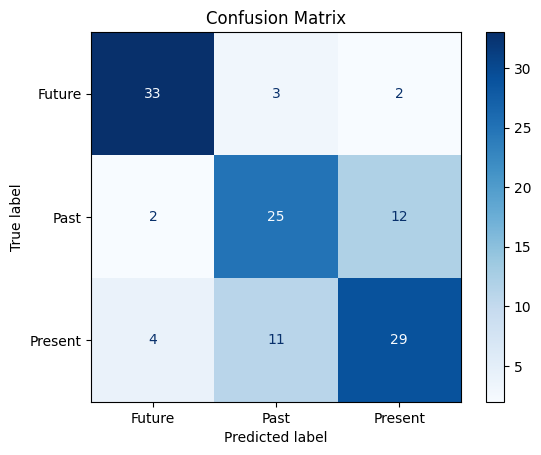

In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

##Learning curve

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

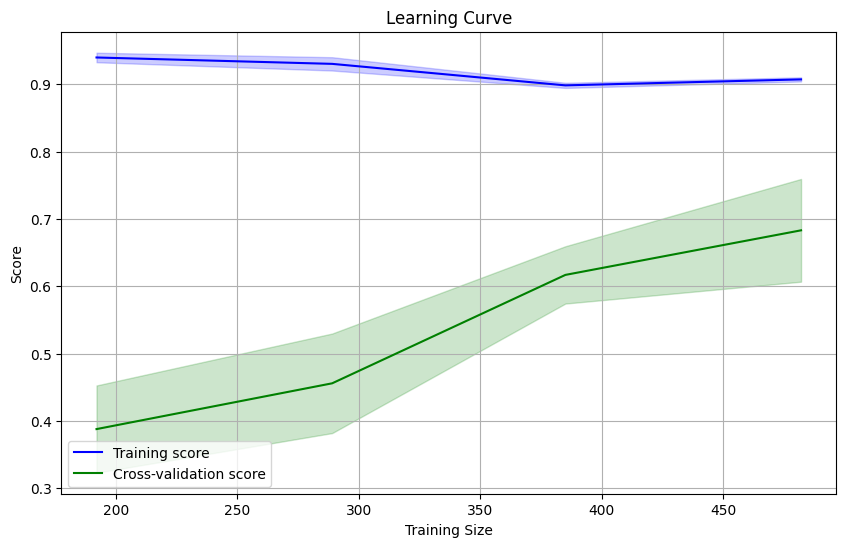

In [51]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

##Predict on new sentences

In [52]:
new_sentences = ["මහාජනො මගං සෙවිස‍්සති ", "සො භවිස‍්සති", "භූපති නිධයො පාලෙසි"]
new_features = vectorizer.transform(new_sentences)
predicted_tenses = model.predict(new_features)
predicted_labels = label_encoder.inverse_transform(predicted_tenses)

print("\nPredictions for New Sentences:")
for sentence, tense in zip(new_sentences, predicted_labels):
    print(f"Sentence: {sentence} -> Predicted Tense: {tense}")


Predictions for New Sentences:
Sentence: මහාජනො මගං සෙවිස‍්සති  -> Predicted Tense: Future
Sentence: සො භවිස‍්සති -> Predicted Tense: Future
Sentence: භූපති නිධයො පාලෙසි -> Predicted Tense: Past


##Hyperparameter tuning using GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

## Best hyperparameters

In [55]:
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}



## Step 5: Train the model with the best parameters

In [56]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

##Evaluate the model

In [57]:
y_pred = best_model.predict(X_test)


## Accuracy score


In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with Best Parameters: {accuracy:.2f}")



Accuracy with Best Parameters: 0.72


## Classification report

In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

      Future       0.85      0.87      0.86        38
        Past       0.64      0.64      0.64        39
     Present       0.67      0.66      0.67        44

    accuracy                           0.72       121
   macro avg       0.72      0.72      0.72       121
weighted avg       0.72      0.72      0.72       121



##Confusion matrix

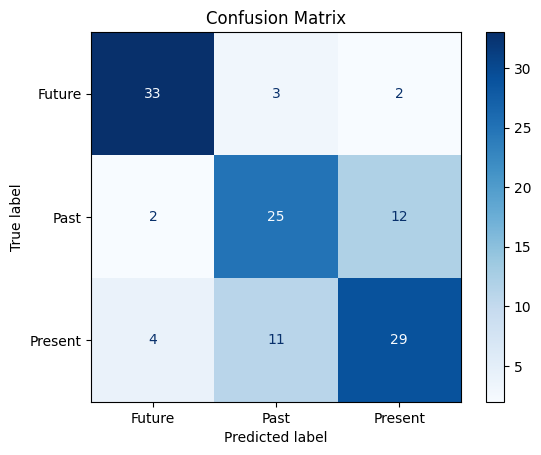

In [60]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Learning curve


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

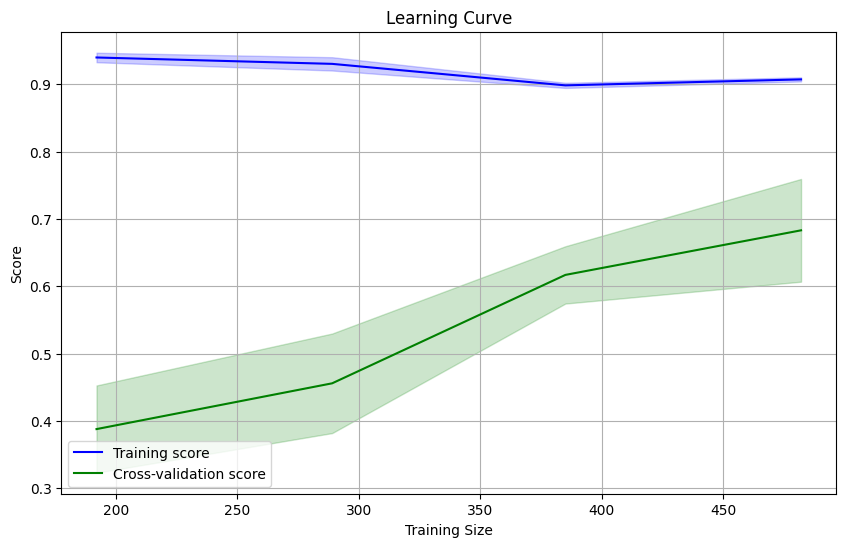

In [61]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

##Predict on new sentences

In [62]:
new_sentences = ["ධම‍්මදස‍්සනසම‍්පන‍්නො භවති", "සො භවිස‍්සති", "භූපති නිධයො පාලෙසි"]
new_features = vectorizer.transform(new_sentences)
predicted_tenses = best_model.predict(new_features)
predicted_labels = label_encoder.inverse_transform(predicted_tenses)

print("\nPredictions for New Sentences:")
for sentence, tense in zip(new_sentences, predicted_labels):
    print(f"Sentence: {sentence} -> Predicted Tense: {tense}")


Predictions for New Sentences:
Sentence: ධම‍්මදස‍්සනසම‍්පන‍්නො භවති -> Predicted Tense: Present
Sentence: සො භවිස‍්සති -> Predicted Tense: Future
Sentence: භූපති නිධයො පාලෙසි -> Predicted Tense: Past
